In [1]:
library(nlme)
library(MASS)
library(multilevel)
library(readr)

In [2]:
datos <- read_csv('/home/taz/Documentos/git/Validacion/Pilotaje_tesis_datos_con_códigos.csv',skip=0, col_names=TRUE)
datos_corregidos <- read_csv('/home/taz/Documentos/git/Validacion/Pilotaje_tesis_datos_corregidos.csv',skip=0, col_names=TRUE)

Parsed with column specification:
cols(
  .default = col_double(),
  `p1 genero` = col_character(),
  `p2 dependencia` = col_character(),
  `p4 profesion` = col_character(),
  `p5 genero-director` = col_character(),
  `p6 genero-utp` = col_character(),
  `p7genero-inspector` = col_character(),
  `p22  requisito-centroestudiante` = col_character(),
  `p23 postulacion-centroestudiantes` = col_character(),
  `p24 eleccion-centroestudiante` = col_character(),
  `p26 relacion-director-estudiante` = col_character(),
  `p27 decisiones-proyectos` = col_character(),
  `p28 rol-centroestudiante` = col_character(),
  `p29 elaboracion-pi` = col_character(),
  `p30 rol-centropadres` = col_character(),
  `p31 obgetivo-pedagogico` = col_character(),
  `p32 rol-director-ciudadania` = col_character(),
  `p33 ciudadania-como` = col_character(),
  `p34 orientacion-director-ciudadania` = col_character(),
  `p35 director-conflicto-estudiantes` = col_character(),
  `p36 director-conflicto-apoderados` = col_

In [3]:
datos_corregidos$`p26 relacion-director-estudiante`[datos_corregidos$`p26 relacion-director-estudiante` == "abierta"] <- 4
datos_corregidos$`p26 relacion-director-estudiante`[datos_corregidos$`p26 relacion-director-estudiante` == "normativa"] <- 3
datos_corregidos$`p26 relacion-director-estudiante`[datos_corregidos$`p26 relacion-director-estudiante` == "direccionada"] <- 2
datos_corregidos$`p26 relacion-director-estudiante`[datos_corregidos$`p26 relacion-director-estudiante` == "no-existe"] <- 1
datos_corregidos$`p26 relacion-director-estudiante`=as.numeric(datos_corregidos$`p26 relacion-director-estudiante`)
#datos_corregidos$`p26 relacion-director-estudiante`

In [4]:
datos_corregidos$`p35 director-conflicto-estudiantes`[datos_corregidos$`p35 director-conflicto-estudiantes` == "oportunidad"] <- 1
datos_corregidos$`p35 director-conflicto-estudiantes`[datos_corregidos$`p35 director-conflicto-estudiantes` == "consenso"] <- 2
datos_corregidos$`p35 director-conflicto-estudiantes`[datos_corregidos$`p35 director-conflicto-estudiantes` == "negacion"] <- 3
datos_corregidos$`p35 director-conflicto-estudiantes`[datos_corregidos$`p35 director-conflicto-estudiantes` == "otro"] <- 4
datos_corregidos$`p35 director-conflicto-estudiantes`=as.numeric(datos_corregidos$`p35 director-conflicto-estudiantes`)
#datos_corregidos$`p35 director-conflicto-estudiantes`

In [5]:
#Corroborar correspondencia
datos_corregidos$`p36 director-conflicto-apoderados`[datos_corregidos$`p36 director-conflicto-apoderados` == "dialogo"] <- 1
datos_corregidos$`p36 director-conflicto-apoderados`[datos_corregidos$`p36 director-conflicto-apoderados` == "imagen"] <- 2
datos_corregidos$`p36 director-conflicto-apoderados`[datos_corregidos$`p36 director-conflicto-apoderados` == "reglas"] <- 3
datos_corregidos$`p36 director-conflicto-apoderados`[datos_corregidos$`p36 director-conflicto-apoderados` == "otro"] <- 4
datos_corregidos$`p36 director-conflicto-apoderados`=as.numeric(datos_corregidos$`p36 director-conflicto-apoderados`)
#datos_corregidos$`p36 director-conflicto-apoderados`

# Fiabilidad

### Se considera que existe una buena consistencia interna cuando el valor de alfa es superior a 0,7, según Formación continuada Diseño y validación de cuestionarios (paper facilitado) en la literatura cláscia es mayor a 0.3 pero hay debate respecto a esto.

# Liderazgo autoritario

### Considerando los NA

In [6]:
as.data.frame(cronbach(datos[,8:17]))

Alpha,N
<dbl>,<int>
0.7573786,97


### Datos faltantes incorporados con moda

In [7]:
as.data.frame(cronbach(datos_corregidos[,8:17]))

Alpha,N
<dbl>,<int>
0.7672131,101


# Formación minimalista

### Considerando los NA

In [8]:
as.data.frame(cronbach(datos[,18:20]))

Alpha,N
<dbl>,<int>
0.6984669,99


### Datos faltantes incorporados con moda

In [9]:
as.data.frame(cronbach(datos_corregidos[,18:20]))

Alpha,N
<dbl>,<int>
0.6987556,101


# Liderazgo

### Data única por reescalamiento de opciones

In [10]:
as.data.frame(cronbach(datos_corregidos[,25:26]))

Alpha,N
<dbl>,<int>
0.7073463,101


# Democracia

### Data única por reescalamiento de opciones

In [11]:
as.data.frame(cronbach(datos_corregidos[,35:36]))

Alpha,N
<dbl>,<int>
0.7616467,101


# Liderazgo democratico

### No existen datos faltantes para estee constructo

In [12]:
as.data.frame(cronbach(datos_corregidos[,37:42]))

Alpha,N
<dbl>,<int>
0.9237079,101


## Mezclando con liderazgo asecas

In [13]:
data_LD=cbind(datos_corregidos[,25:26],datos_corregidos[,37:42])

In [14]:
as.data.frame(cronbach(data_LD))

Alpha,N
<dbl>,<int>
0.9214402,101


# Frecuencia y moda de los datos

In [15]:
library(modeest)

In [16]:
mlv(datos_corregidos$`p12 amenaza-inspectoria`, method = "mfv")

[1] 3

In [17]:
Moda=as.data.frame(apply(datos_corregidos, 2, mlv,  method = "mfv")) #Incorporar frecuencia de la moda absoluta

In [18]:
frecuencia=c()
for (i in 1:42){
    frecuencia=rbind(frecuencia,max(table(datos[,i])))
}

In [19]:
Moda=cbind(Moda,frecuencia)
names(Moda)=c('Dato modal','Frecuencia absoluta')

In [20]:
Moda

,Dato modal,Frecuencia absoluta
,<fct>,<int>
p1 genero,mujer,85
p2 dependencia,municipal,72
p3 edad,2,52
p4 profesion,basica,61
p5 genero-director,mujer,56
p6 genero-utp,mujer,90
p7genero-inspector,mujer,53
p8 decision-autorizacion,3,47
p9 director-encargado-normas,4,41


# Graficos

## Pregunta 1

## Género:

In [21]:
library(RColorBrewer) #Libreria de colores

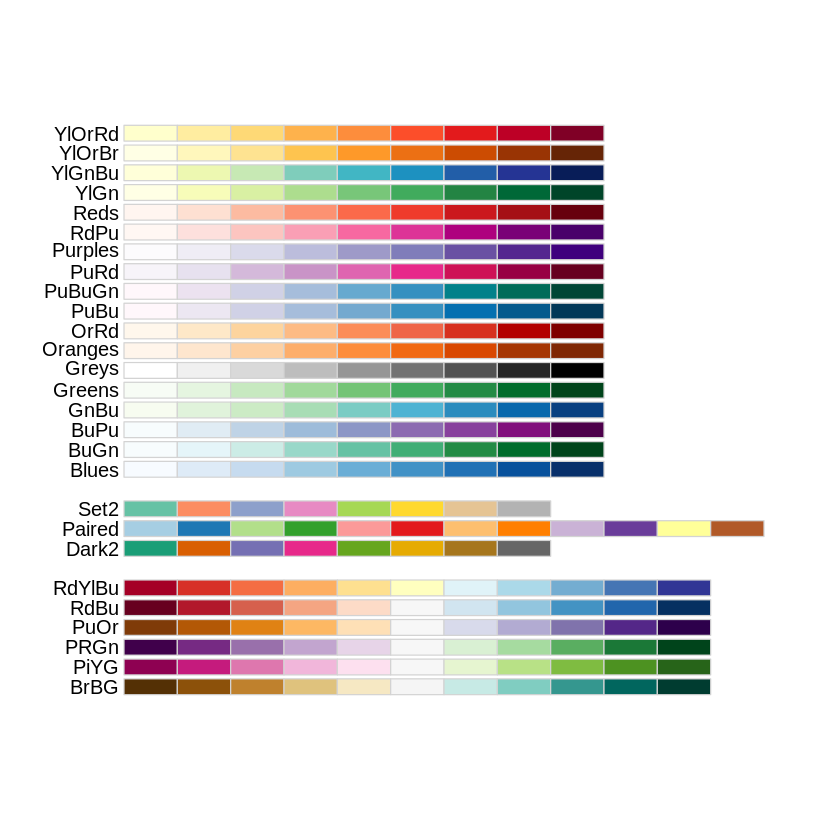

In [22]:
display.brewer.all(colorblindFriendly = T)  
#nombre de paletas de colores en este caso utilizaremos Dark2 por mayor variedad de colores y más accesibilidad para personas en situación de discapacidad visual

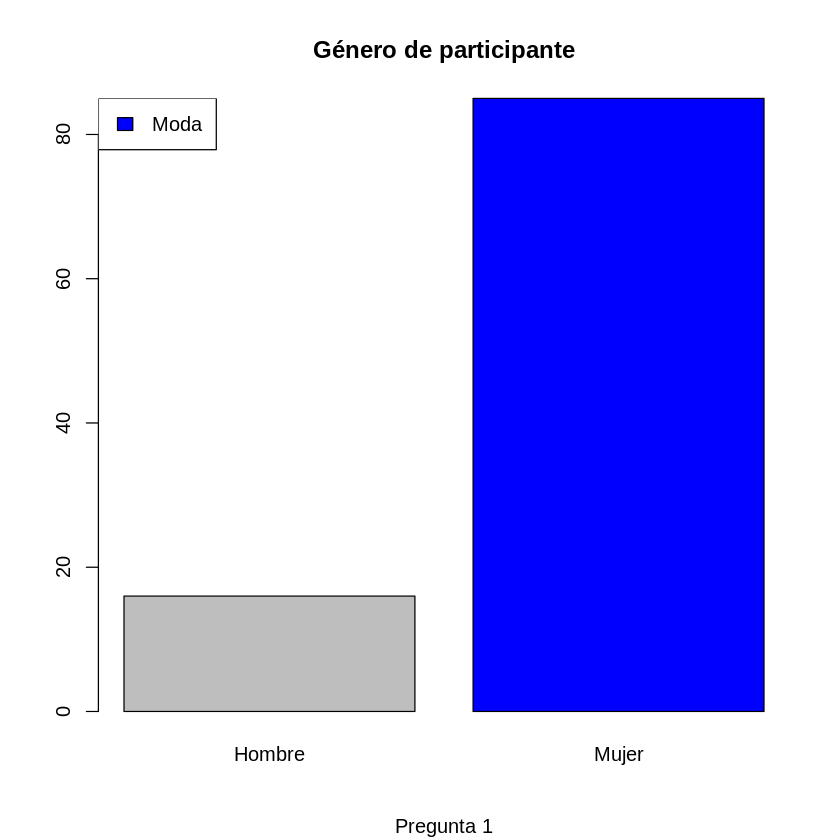

In [23]:
barplot(table(datos[,1]),names.arg=c('Hombre','Mujer'),main = "Género de participante",sub = "Pregunta 1", col = c(rep("gray", 1),4))
legend("topleft", "Moda", fill = 4) 

In [24]:
porcentajes <- as.numeric(round(((prop.table(table(datos[,1])))*100),2))
etiquetas <- c("Hombre", "Mujer")
etiquetas <- paste(etiquetas, porcentajes)
etiquetas <- paste(etiquetas, "%", sep = "")

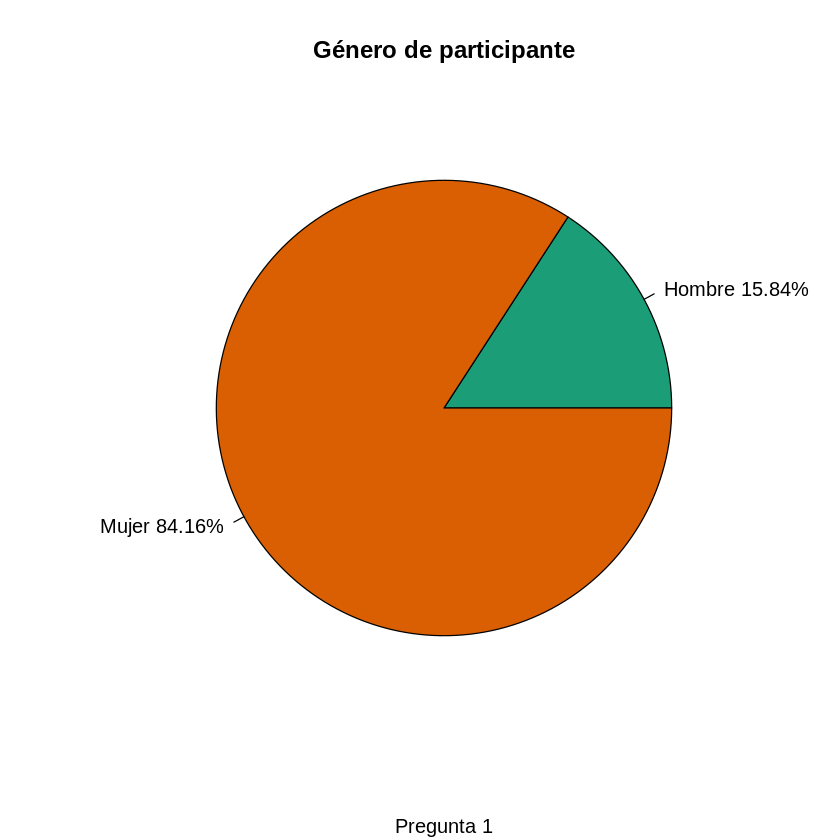

In [25]:
pie(porcentajes, etiquetas,
    main = "Género de participante",
    sub = "Pregunta 1",
   col=brewer.pal(4, "Dark2"))

## Pregunta 2

## Tipo de dependencia de la escuela donde trabaja:

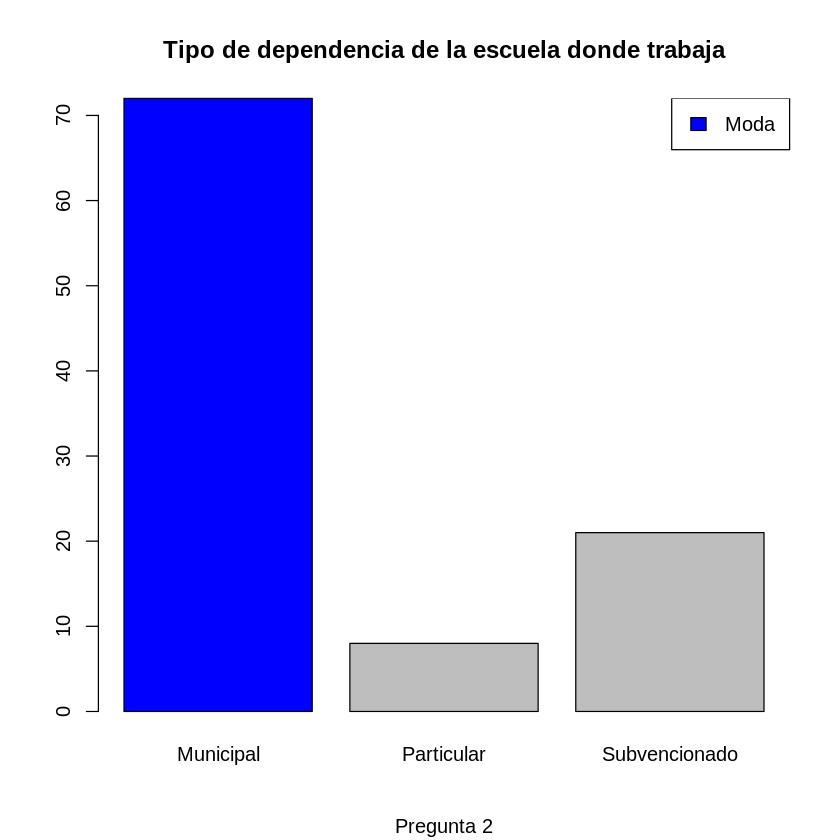

In [26]:
barplot(table(datos[,2]),names.arg=c('Municipal','Particular','Subvencionado'),main = "Tipo de dependencia de la escuela donde trabaja", col = c(4,rep("gray", 2)),sub='Pregunta 2')
legend("topright", "Moda", fill = 4)

In [27]:
porcentajes <- as.numeric(round(((prop.table(table(datos[,2])))*100),2))
etiquetas <- c("Municipal", "particular","Subvencionado")
etiquetas <- paste(etiquetas, porcentajes)
etiquetas <- paste(etiquetas, "%", sep = "")

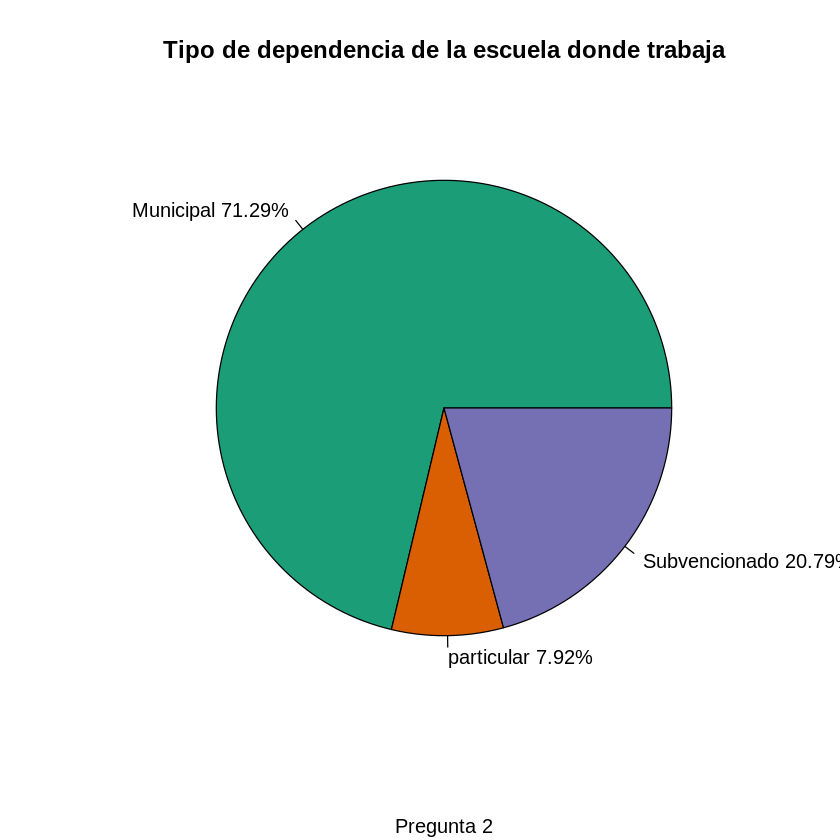

In [28]:
pie(porcentajes, etiquetas,
    main = "Tipo de dependencia de la escuela donde trabaja",
    sub = "Pregunta 2",
   col=brewer.pal(4, "Dark2"))

## Pregunta 3

## Edad:

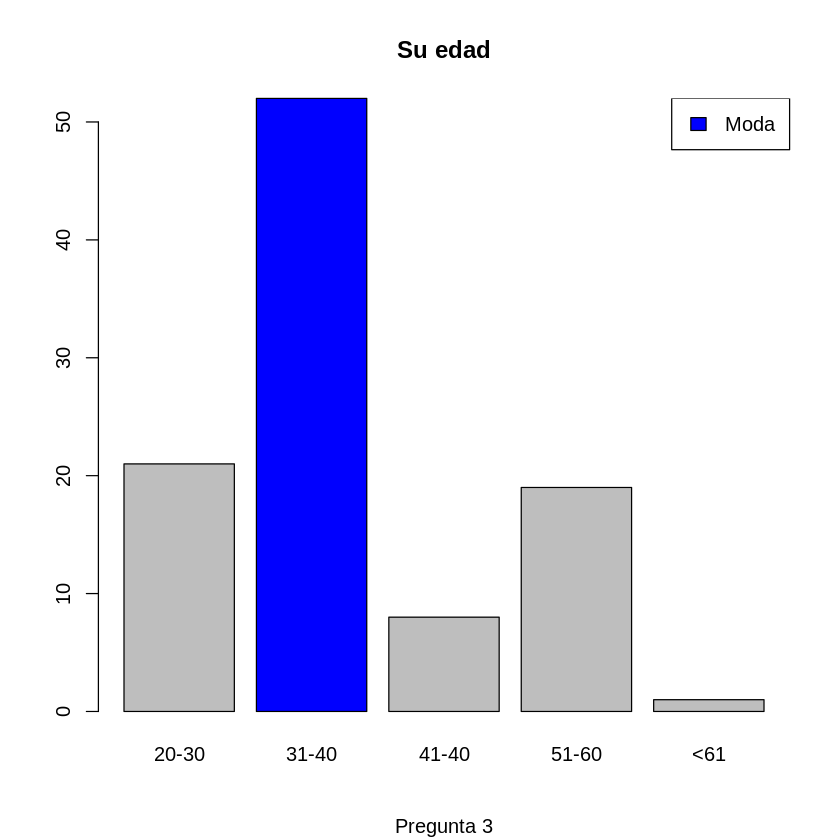

In [29]:
barplot(table(datos[,3]),names.arg=c('20-30','31-40','41-40','51-60','<61'),main = "Su edad", col = c("gray",4,rep("gray", 3)),sub='Pregunta 3')
legend("topright", "Moda", fill = 4)

## Pregunta 4

## Profesión

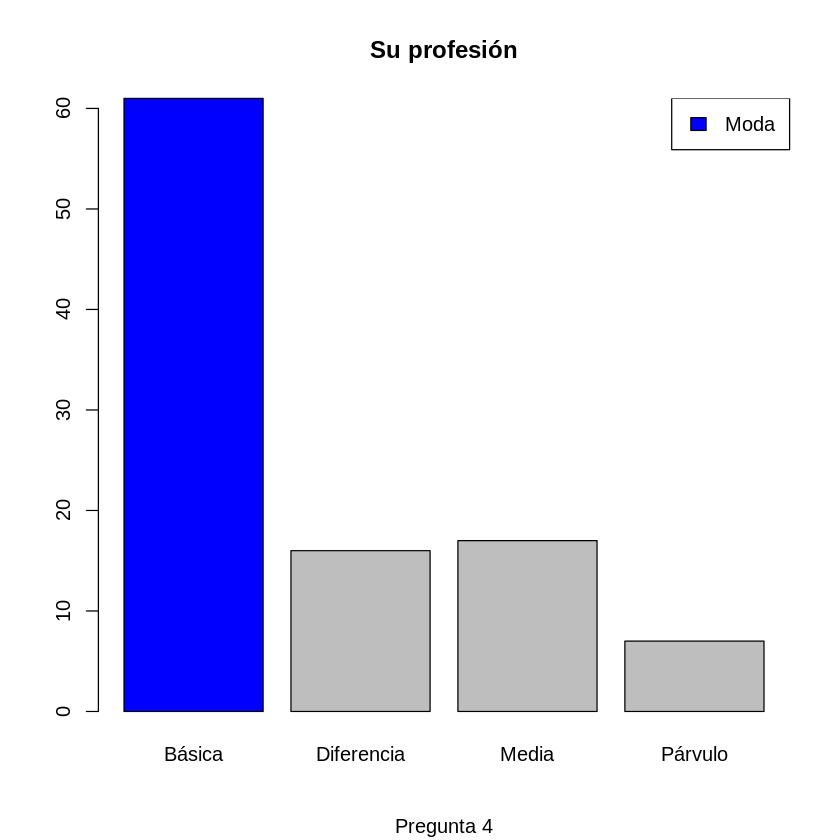

In [103]:
barplot(table(datos[,4]),names.arg=c('Básica','Diferencia','Media','Párvulo'),main = "Su profesión", col = c(4,rep("gray", 3)), sub='Pregunta 4')
legend("topright", "Moda", fill = 4) #Básica, Párvulo

## Pregunta 5

## Genero de director(a)

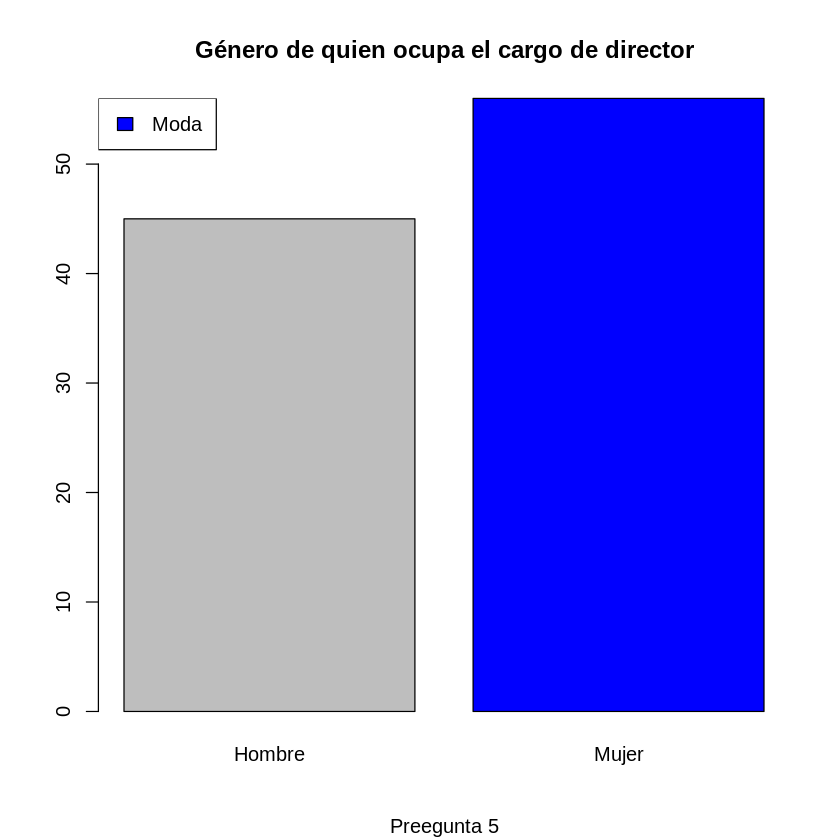

In [31]:
barplot(table(datos[,5]),names.arg=c('Hombre','Mujer'),main = "Género de quien ocupa el cargo de director", col = c(rep("gray", 1),4), sub='Preegunta 5')
legend("topleft", "Moda", fill = 4)

## Pregunta 6

## Género UTP

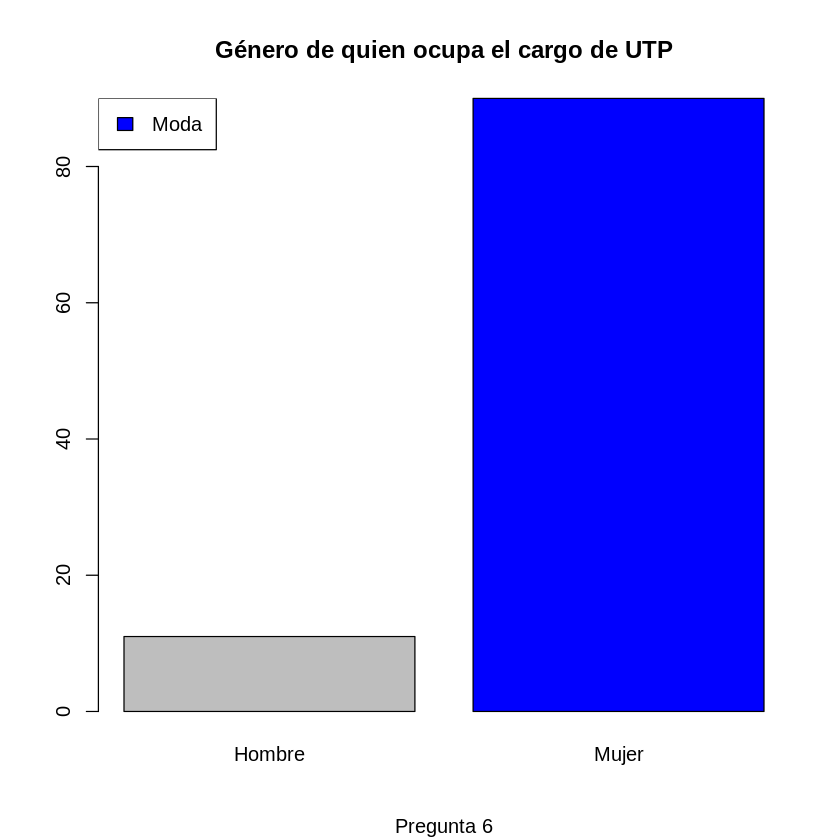

In [32]:
barplot(table(datos[,6]),names.arg=c('Hombre','Mujer'),main = "Género de quien ocupa el cargo de UTP", col = c(rep("gray", 1),4),sub='Pregunta 6')
legend("topleft", "Moda", fill = 4)

## Pregunta 7

## Género inspector(a) general

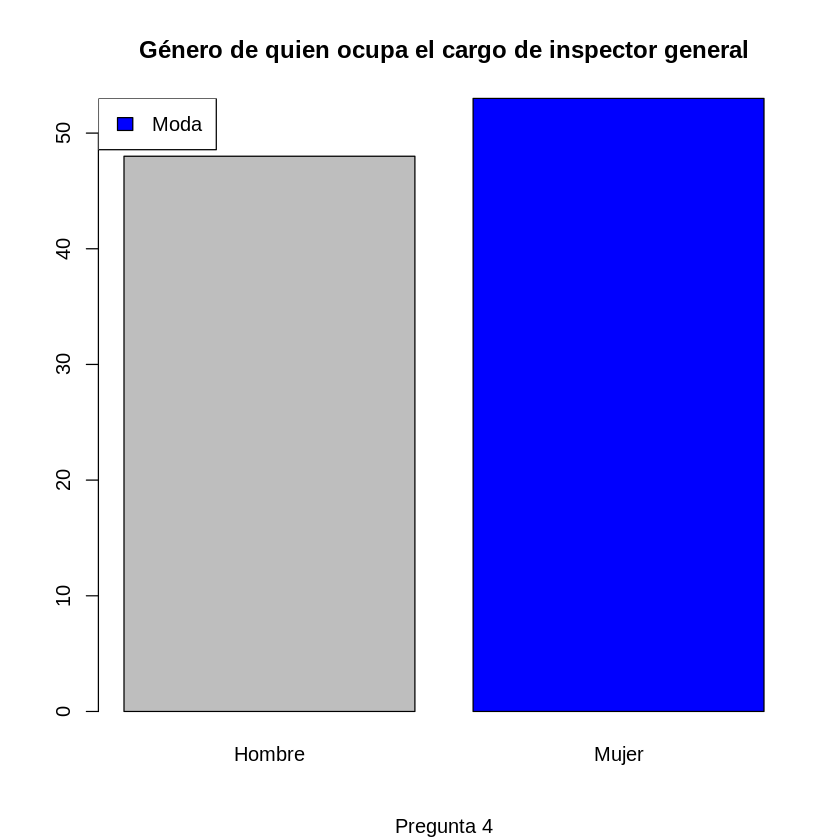

In [33]:
barplot(table(datos[,7]),names.arg=c('Hombre','Mujer'),main = "Género de quien ocupa el cargo de inspector general", col = c(rep("gray", 1),4),sub='Pregunta 4')
legend("topleft", "Moda", fill = 4)

# Analisis de clases latentes para data nominal


In [34]:
library(scatterplot3d)
library(poLCA)

# Democracia


In [35]:
datos_corregidos$`p22  requisito-centroestudiante`[datos_corregidos$`p22  requisito-centroestudiante` == "Sí"] <- 1
datos_corregidos$`p22  requisito-centroestudiante`[datos_corregidos$`p22  requisito-centroestudiante` == "No"] <- 2
datos_corregidos$`p22  requisito-centroestudiante`=as.numeric(datos_corregidos$`p22  requisito-centroestudiante`)
#datos_corregidos$`p22  requisito-centroestudiante`

In [36]:
datos_corregidos$`p23 postulacion-centroestudiantes`[datos_corregidos$`p23 postulacion-centroestudiantes` == "lista"] <- 1
datos_corregidos$`p23 postulacion-centroestudiantes`[datos_corregidos$`p23 postulacion-centroestudiantes` == "individual"] <- 2
datos_corregidos$`p23 postulacion-centroestudiantes`[datos_corregidos$`p23 postulacion-centroestudiantes` == "eleccion-directorios"] <- 3
datos_corregidos$`p23 postulacion-centroestudiantes`[datos_corregidos$`p23 postulacion-centroestudiantes` == "representante-curso"] <- 4
datos_corregidos$`p23 postulacion-centroestudiantes`[datos_corregidos$`p23 postulacion-centroestudiantes` == "otro"] <- 5
datos_corregidos$`p23 postulacion-centroestudiantes`=as.numeric(datos_corregidos$`p23 postulacion-centroestudiantes`)
#datos_corregidos$`p23 postulacion-centroestudiantes`

In [37]:
datos_corregidos$`p24 eleccion-centroestudiante`[datos_corregidos$`p24 eleccion-centroestudiante` == "votacion-estudiantes"] <- 1
datos_corregidos$`p24 eleccion-centroestudiante`[datos_corregidos$`p24 eleccion-centroestudiante` == "designacion-directivos"] <- 2
datos_corregidos$`p24 eleccion-centroestudiante`[datos_corregidos$`p24 eleccion-centroestudiante` == "eleccion-curso"] <- 3
datos_corregidos$`p24 eleccion-centroestudiante`[datos_corregidos$`p24 eleccion-centroestudiante` == "otro"] <- 4
datos_corregidos$`p24 eleccion-centroestudiante`=as.numeric(datos_corregidos$`p24 eleccion-centroestudiante`)
#datos_corregidos$`p24 eleccion-centroestudiante`

In [38]:
datos_corregidos$`p27 decisiones-proyectos`[datos_corregidos$`p27 decisiones-proyectos` == "autoridad-total"] <- 1
datos_corregidos$`p27 decisiones-proyectos`[datos_corregidos$`p27 decisiones-proyectos` == "equipo-directivo"] <- 2
datos_corregidos$`p27 decisiones-proyectos`[datos_corregidos$`p27 decisiones-proyectos` == "director-comunidad"] <- 3
datos_corregidos$`p27 decisiones-proyectos`[datos_corregidos$`p27 decisiones-proyectos` == "no-involucrado"] <- 4
datos_corregidos$`p27 decisiones-proyectos`[datos_corregidos$`p27 decisiones-proyectos` == "administrador"] <- 5
datos_corregidos$`p27 decisiones-proyectos`[datos_corregidos$`p27 decisiones-proyectos` == "Ninguna de las anteriores"] <- 6
datos_corregidos$`p27 decisiones-proyectos`=as.numeric(datos_corregidos$`p27 decisiones-proyectos`)
#datos_corregidos$`p27 decisiones-proyectos`

In [39]:
datos_corregidos$`p28 rol-centroestudiante`[datos_corregidos$`p28 rol-centroestudiante` == "canalizadores"] <- 1
datos_corregidos$`p28 rol-centroestudiante`[datos_corregidos$`p28 rol-centroestudiante` == "representantes"] <- 2
datos_corregidos$`p28 rol-centroestudiante`[datos_corregidos$`p28 rol-centroestudiante` == "administradores"] <- 3
datos_corregidos$`p28 rol-centroestudiante`[datos_corregidos$`p28 rol-centroestudiante` == "ninguna"] <- 4
datos_corregidos$`p28 rol-centroestudiante`=as.numeric(datos_corregidos$`p28 rol-centroestudiante`)
#datos_corregidos$`p28 rol-centroestudiante`

In [40]:
datos_corregidos$`p29 elaboracion-pi`[datos_corregidos$`p29 elaboracion-pi` == "representantes"] <- 1
datos_corregidos$`p29 elaboracion-pi`[datos_corregidos$`p29 elaboracion-pi` == "reunion-abierta"] <- 2
datos_corregidos$`p29 elaboracion-pi`[datos_corregidos$`p29 elaboracion-pi` == "comunidad"] <- 3
datos_corregidos$`p29 elaboracion-pi`[datos_corregidos$`p29 elaboracion-pi` == "sontenedor-director"] <- 4
datos_corregidos$`p29 elaboracion-pi`[datos_corregidos$`p29 elaboracion-pi` == "escogidos"] <- 5
datos_corregidos$`p29 elaboracion-pi`[datos_corregidos$`p29 elaboracion-pi` == "ninguna-anterior"] <- 6
datos_corregidos$`p29 elaboracion-pi`=as.numeric(datos_corregidos$`p29 elaboracion-pi`)
#datos_corregidos$`p29 elaboracion-pi`

In [41]:
datos_corregidos$`p30 rol-centropadres`[datos_corregidos$`p30 rol-centropadres` == "organizador"] <- 1
datos_corregidos$`p30 rol-centropadres`[datos_corregidos$`p30 rol-centropadres` == "administrador"] <- 2
datos_corregidos$`p30 rol-centropadres`[datos_corregidos$`p30 rol-centropadres` == "representar"] <- 3
datos_corregidos$`p30 rol-centropadres`[datos_corregidos$`p30 rol-centropadres` == "gestor"] <- 4
datos_corregidos$`p30 rol-centropadres`[datos_corregidos$`p30 rol-centropadres` == "velar-normas"] <- 5
datos_corregidos$`p30 rol-centropadres`[datos_corregidos$`p30 rol-centropadres` == "ninguna-anterior"] <- 6
datos_corregidos$`p30 rol-centropadres`=as.numeric(datos_corregidos$`p30 rol-centropadres`)
#datos_corregidos$`p30 rol-centropadres`

In [42]:
#Data democracia
data_democracia=cbind(datos_corregidos[,21:24],datos_corregidos[,27:30],datos_corregidos[,35:36])
names(data_democracia)=c('p21','p22','p23','p24','p27','p28','p29','p30','p35','p36')

In [43]:
f_democracia <- cbind(`p21`,`p22`,`p23`,`p24`,`p27`,`p28`,`p29`,`p30`,`p35`,`p36`)~1

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$p21
           Pr(1) Pr(2)  Pr(3)  Pr(4)
class 1:  0.1683 0.396 0.3762 0.0594

$p22
           Pr(1)  Pr(2)
class 1:  0.5545 0.4455

$p23
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)
class 1:  0.7129 0.0792 0.0396 0.1485 0.0198

$p24
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.9109 0.0099 0.0693 0.0099

$p27
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)
class 1:  0.0495 0.3663 0.5347 0.0297 0.0198

$p28
           Pr(1)  Pr(2)  Pr(3) Pr(4)
class 1:  0.4356 0.3861 0.0792 0.099

$p29
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.4554 0.2277 0.0198 0.1188 0.0891 0.0891

$p30
           Pr(1)  Pr(2) Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.3069 0.0198 0.297 0.3168 0.0099 0.0495

$p35
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.4455 0.3267 0.1782 0.0495

$p36
           Pr(1) Pr(2)  Pr(3)  Pr(4)
class 1:  0.3564 0.495 0.1089 0.0396

Estimated class population shares 
 

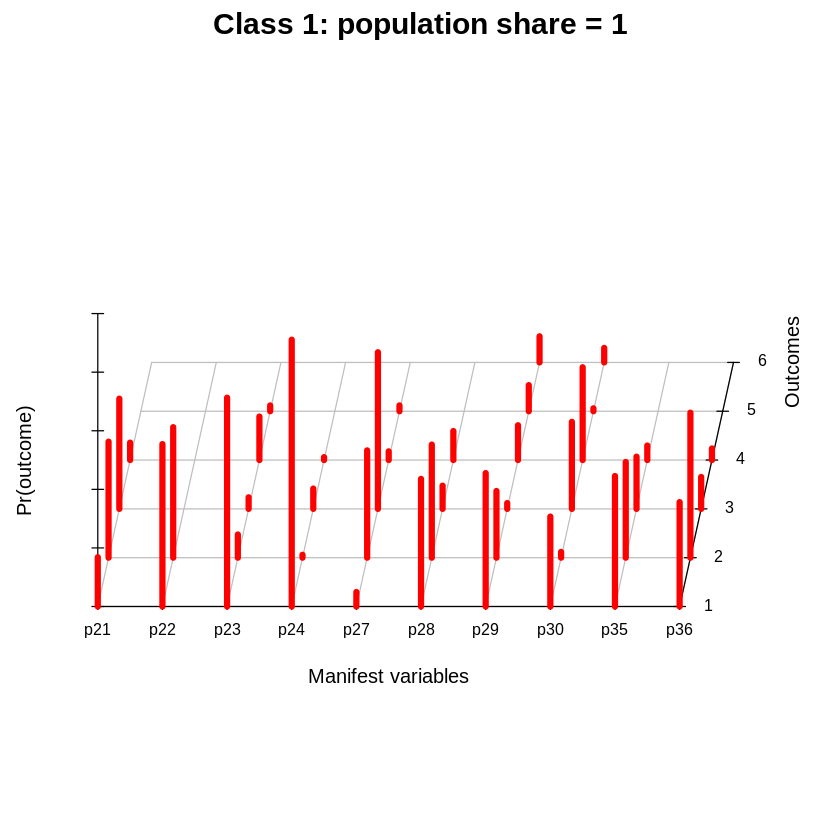

In [44]:
funcion <- poLCA(f_democracia, data=data_democracia, nclass = 1, maxiter = 1000, graphs = TRUE,
tol = 1e-10, na.rm = TRUE, probs.start = NULL, nrep = 1,
verbose = TRUE, calc.se = TRUE)

Ajuste a una clase latente
========================================================= 
Numero de datos: 101 

Numero de parametros estimados: 35 

Grados de libertad: 66 

Maxima log-verosimilutd: -1056.233 Es una medida de ajuste del modelo

Coeficiente de Akaike (Mientras más pequeño el AIC es mejor modeelo comparativamente, la comparación sólo es valida entre conjuntos con las mismas variables. Pero es sensible al numero de datos)

AIC(1): 2182.466

Coeficiente BIC (Igual al anterior, es menos sensible a la cantidad de datos, pero en este caso se estanca siempre en 1, este es sensible a los grados de libertad)

BIC(1): 2273.995

G^2(1): 1194.074 (Likelihood ratio/deviance statistic) 

X^2(1): 34719369 (Chi-square goodness of fit) 

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$p21
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.1878 0.3637 0.4122 0.0364
class 2:  0.1432 0.4378 0.3299 0.0891

$p22
           Pr(1)  Pr(2)
class 1:  0.6630 0.3370
class 2:  0.4145 0.5855

$p23
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)
class 1:  0.8276 0.0185 0.0000 0.1539 0.0000
class 2:  0.5649 0.1575 0.0907 0.1416 0.0453

$p24
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.9518 0.0000 0.0482 0.0000
class 2:  0.8582 0.0227 0.0965 0.0227

$p27
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)
class 1:  0.0000 0.3563 0.6261 0.0176 0.0000
class 2:  0.1133 0.3792 0.4168 0.0453 0.0453

$p28
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.4590 0.4936 0.0474 0.0000
class 2:  0.4055 0.2476 0.1203 0.2267

$p29
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.5010 0.3267 0.0352 0.0623 0.0222 0.0527
class 2:  0.3967 0.1002 0.0000 0.1917 0.1754 0.1360

$p30
           Pr(1) 

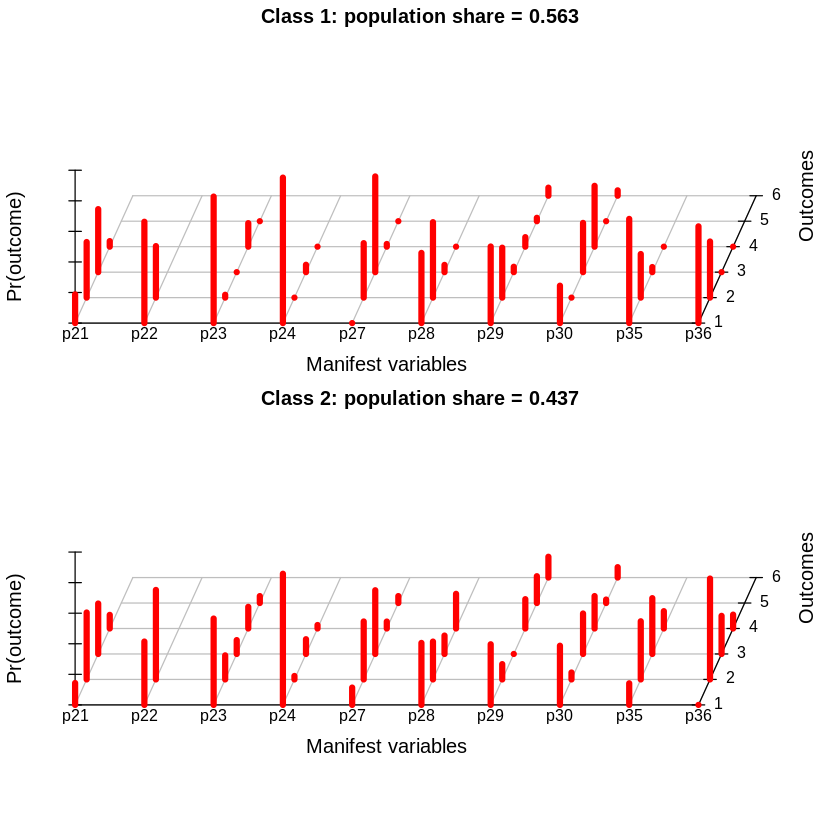

In [45]:
funcion <- poLCA(f_democracia, data=data_democracia, nclass = 2, maxiter = 1000, graphs = TRUE,
tol = 1e-10, na.rm = TRUE, probs.start = NULL, nrep = 1,
verbose = TRUE, calc.se = TRUE)

# Este es el mejor modelo según AIC

Ajuste a dos clases latentes
========================================================= 
Numero de datos: 101 

Numero de parametros estimados: 71 

Grados de libertad: 30 

Maxima log-verosimilutd: -1056.233 Es una medida de ajuste del modelo

Coeficiente de Akaike (Mientras más pequeño el AIC es mejor modeelo comparativamente, la comparación sólo es valida entre conjuntos con las mismas variables. Pero es sensible al numero de datos)

AIC(1): 2162.313

Coeficiente BIC (Igual al anterior, es menos sensible a la cantidad de datos, pero en este caso se estanca siempre en 1, este es sensible a los grados de libertad)

BIC(1): 2347.986

G^2(1): 1101.921 (Likelihood ratio/deviance statistic) 

X^2(1): 416557 (Chi-square goodness of fit) 

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$p21
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.1655 0.3646 0.4120 0.0579
class 2:  0.0572 0.4655 0.4001 0.0772
class 3:  0.6021 0.2955 0.1024 0.0000

$p22
           Pr(1)  Pr(2)
class 1:  0.7172 0.2828
class 2:  0.4537 0.5463
class 3:  0.0990 0.9010

$p23
           Pr(1)  Pr(2)  Pr(3)  Pr(4) Pr(5)
class 1:  0.7900 0.0194 0.0000 0.1906 0.000
class 2:  0.7144 0.1816 0.0520 0.0000 0.052
class 3:  0.3109 0.0000 0.1962 0.4928 0.000

$p24
           Pr(1) Pr(2)  Pr(3) Pr(4)
class 1:  0.9803 0.000 0.0197 0.000
class 2:  0.8444 0.026 0.1036 0.026
class 3:  0.8054 0.000 0.1946 0.000

$p27
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)
class 1:  0.0192 0.4046 0.5762 0.0000 0.0000
class 2:  0.1038 0.3022 0.5940 0.0000 0.0000
class 3:  0.0000 0.4118 0.0976 0.2944 0.1962

$p28
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.6032 0.3764 0.0204 0.0000
class 2:  0.2438 0.4720 0.1282 0.1560
class 3

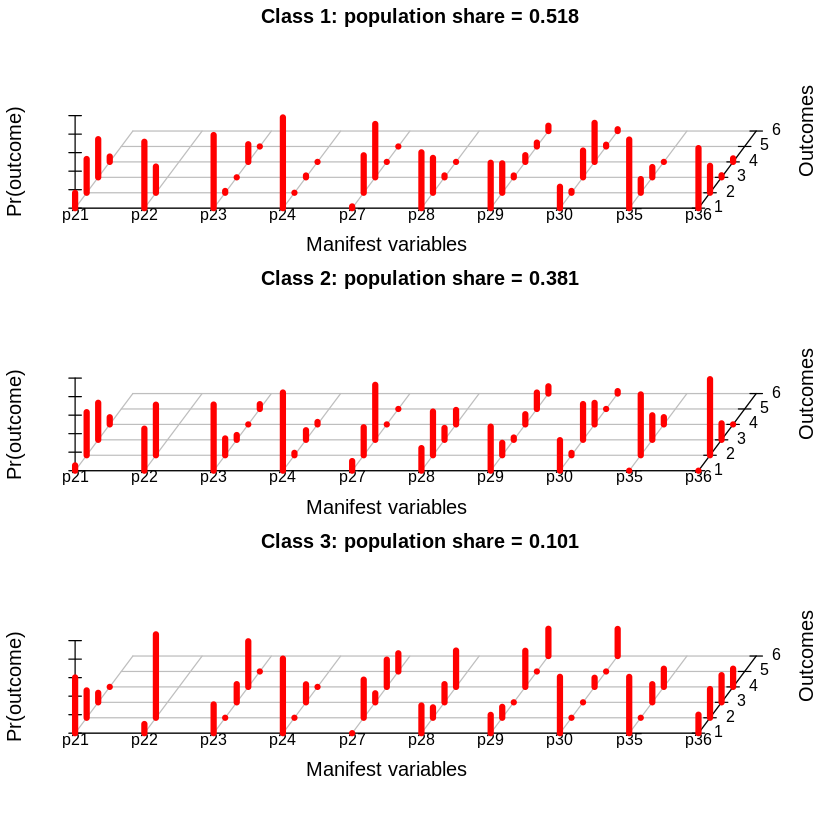

In [46]:
funcion <- poLCA(f_democracia, data=data_democracia, nclass = 3, maxiter = 1000, graphs = TRUE,
tol = 1e-10, na.rm = TRUE, probs.start = NULL, nrep = 1,
verbose = TRUE, calc.se = TRUE)

Ajuste a dos clases latentes
========================================================= 
Numero de datos: 101 

Numero de parametros estimados: 107 

Grados de libertad: -6

Maxima log-verosimilutd: -978.2059 Es una medida de ajuste del modelo

Coeficiente de Akaike (Mientras más pequeño el AIC es mejor modeelo comparativamente, la comparación sólo es valida entre conjuntos con las mismas variables. Pero es sensible al numero de datos)

AIC(1): 2170.412

Coeficiente BIC (Igual al anterior, es menos sensible a la cantidad de datos, pero en este caso se estanca siempre en 1, este es sensible a los grados de libertad)

BIC(1): 2450.23

G^2(1): 1038.02 (Likelihood ratio/deviance statistic) 

X^2(1): 921951.4 (Chi-square goodness of fit) 

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$p21
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  1.0000 0.0000 0.0000 0.0000
class 2:  0.4287 0.4285 0.1429 0.0000
class 3:  0.0195 0.4470 0.4686 0.0649
class 4:  0.2254 0.3649 0.3427 0.0669

$p22
           Pr(1)  Pr(2)
class 1:  0.3266 0.6734
class 2:  0.0000 1.0000
class 3:  0.5314 0.4686
class 4:  0.6794 0.3206

$p23
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)
class 1:  0.6632 0.3368 0.0000 0.0000 0.0000
class 2:  0.1430 0.0000 0.2857 0.5713 0.0000
class 3:  0.7005 0.1302 0.0434 0.0825 0.0434
class 4:  0.8176 0.0223 0.0000 0.1601 0.0000

$p24
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.6632 0.0000 0.3368 0.0000
class 2:  0.8573 0.0000 0.1427 0.0000
class 3:  0.8917 0.0217 0.0649 0.0217
class 4:  0.9553 0.0000 0.0447 0.0000

$p27
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)
class 1:  0.3368 0.6632 0.0000 0.0000 0.0000
class 2:  0.0000 0.4286 0.0000 0.2857 0.2857
class 3:  0.065

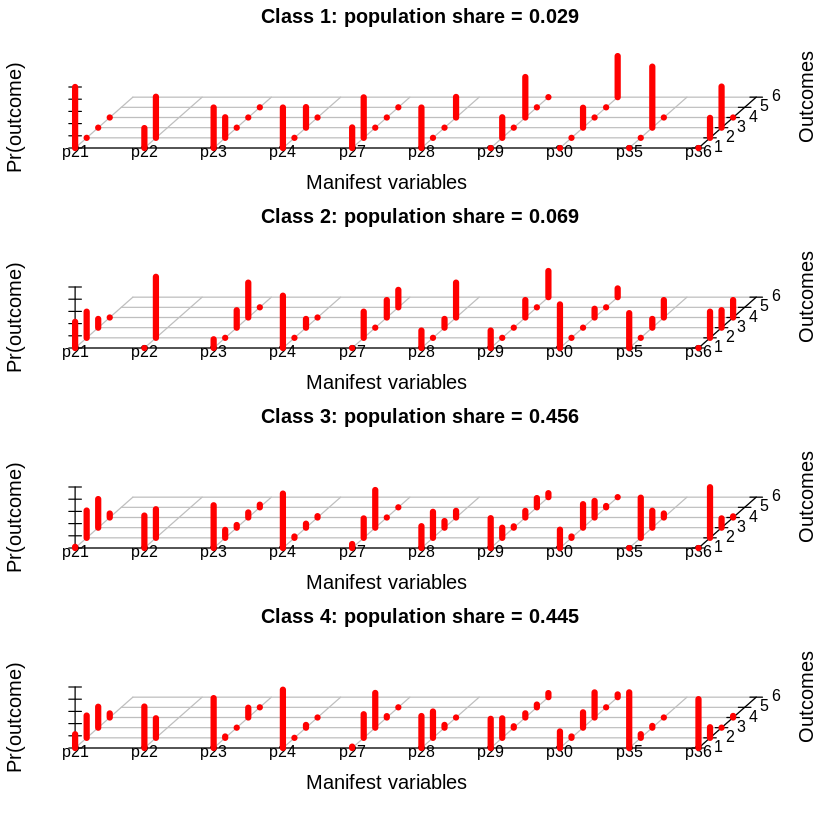

In [47]:
funcion <- poLCA(f_democracia, data=data_democracia, nclass = 4, maxiter = 1000, graphs = TRUE,
tol = 1e-10, na.rm = TRUE, probs.start = NULL, nrep = 1,
verbose = TRUE, calc.se = TRUE)

Ajuste a dos clases latentes
========================================================= 
Numero de datos: 101 

Numero de parametros estimados: 143 

Grados de libertad: -42

Maxima log-verosimilutd: -943.3045 Es una medida de ajuste del modelo

Coeficiente de Akaike (Mientras más pequeño el AIC es mejor modeelo comparativamente, la comparación sólo es valida entre conjuntos con las mismas variables. Pero es sensible al numero de datos)

AIC(1): 2172.609

Coeficiente BIC (Igual al anterior, es menos sensible a la cantidad de datos, pero en este caso se estanca siempre en 1, este es sensible a los grados de libertad)

BIC(1): 2546.571

G^2(1): 968.2177 (Likelihood ratio/deviance statistic) 

X^2(1): 407064.3 (Chi-square goodness of fit) 

# Ciudadanía

In [48]:
datos_corregidos$`p31 obgetivo-pedagogico`[datos_corregidos$`p31 obgetivo-pedagogico` == "diciplinares"] <- 1
datos_corregidos$`p31 obgetivo-pedagogico`[datos_corregidos$`p31 obgetivo-pedagogico` == "laborales"] <- 2
datos_corregidos$`p31 obgetivo-pedagogico`[datos_corregidos$`p31 obgetivo-pedagogico` == "altos-puntajes"] <- 3
datos_corregidos$`p31 obgetivo-pedagogico`[datos_corregidos$`p31 obgetivo-pedagogico` == "comunitarios"] <- 4
datos_corregidos$`p31 obgetivo-pedagogico`[datos_corregidos$`p31 obgetivo-pedagogico` == "inclusivos"] <- 5
datos_corregidos$`p31 obgetivo-pedagogico`[datos_corregidos$`p31 obgetivo-pedagogico` == "confesionarios"] <- 6
datos_corregidos$`p31 obgetivo-pedagogico`[datos_corregidos$`p31 obgetivo-pedagogico` == "ninguna-anterior"] <- 7
datos_corregidos$`p31 obgetivo-pedagogico`=as.numeric(datos_corregidos$`p31 obgetivo-pedagogico`)
#datos_corregidos$`p31 obgetivo-pedagogico`

In [49]:
datos_corregidos$`p32 rol-director-ciudadania`[datos_corregidos$`p32 rol-director-ciudadania` == "supervisar-cumplimiento"] <- 1
datos_corregidos$`p32 rol-director-ciudadania`[datos_corregidos$`p32 rol-director-ciudadania` == "entregar-recursos"] <- 2
datos_corregidos$`p32 rol-director-ciudadania`[datos_corregidos$`p32 rol-director-ciudadania` == "promover-ciudadania"] <- 3
datos_corregidos$`p32 rol-director-ciudadania`[datos_corregidos$`p32 rol-director-ciudadania` == "sin-rol"] <- 4
datos_corregidos$`p32 rol-director-ciudadania`[datos_corregidos$`p32 rol-director-ciudadania` == "ninguna-anterior "] <- 5
datos_corregidos$`p32 rol-director-ciudadania`=as.numeric(datos_corregidos$`p32 rol-director-ciudadania`)
#datos_corregidos$`p32 rol-director-ciudadania`

Warning message in eval(expr, envir, enclos):
“NAs introducidos por coerción”


In [50]:
datos_corregidos$`p33 ciudadania-como`[datos_corregidos$`p33 ciudadania-como` == "asignatura"] <- 1
datos_corregidos$`p33 ciudadania-como`[datos_corregidos$`p33 ciudadania-como` == "historia"] <- 2
datos_corregidos$`p33 ciudadania-como`[datos_corregidos$`p33 ciudadania-como` == "orientacion"] <- 3
datos_corregidos$`p33 ciudadania-como`[datos_corregidos$`p33 ciudadania-como` == "transversal"] <- 4
datos_corregidos$`p33 ciudadania-como`[datos_corregidos$`p33 ciudadania-como` == "otra"] <- 5
datos_corregidos$`p33 ciudadania-como`[datos_corregidos$`p33 ciudadania-como` == "no-se-realiza"] <- 6
datos_corregidos$`p33 ciudadania-como`=as.numeric(datos_corregidos$`p33 ciudadania-como`)
#datos_corregidos$`p33 ciudadania-como`

In [51]:
datos_corregidos$`p34 orientacion-director-ciudadania`[datos_corregidos$`p34 orientacion-director-ciudadania` == "democracia"] <- 1
datos_corregidos$`p34 orientacion-director-ciudadania`[datos_corregidos$`p34 orientacion-director-ciudadania` == "agencia-calidad "] <- 2
datos_corregidos$`p34 orientacion-director-ciudadania`[datos_corregidos$`p34 orientacion-director-ciudadania` == "curriculo"] <- 3
datos_corregidos$`p34 orientacion-director-ciudadania`[datos_corregidos$`p34 orientacion-director-ciudadania` == "simce"] <- 4
datos_corregidos$`p34 orientacion-director-ciudadania`[datos_corregidos$`p34 orientacion-director-ciudadania` == "no-orientación"] <- 5
datos_corregidos$`p34 orientacion-director-ciudadania`[datos_corregidos$`p34 orientacion-director-ciudadania` == "otro"] <- 6
datos_corregidos$`p34 orientacion-director-ciudadania`=as.numeric(datos_corregidos$`p34 orientacion-director-ciudadania`)

Warning message in eval(expr, envir, enclos):
“NAs introducidos por coerción”


In [52]:
table(datos_corregidos$`p34 orientacion-director-ciudadania`)


 1  3  4  5  6 
33 24  3 26  3 

In [53]:
#Data democracia
data_ciudadania=datos_corregidos[,31:34]
names(data_ciudadania)=c('p31','p32','p33','p34')

In [54]:
f_ciudadania <- cbind(`p31`,`p32`,`p33`,`p34`)~1

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$p31
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5) Pr(6)  Pr(7)
class 1:  0.1299 0.0519 0.0649 0.4416 0.2338     0 0.0779

$p32
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.1039 0.1429 0.5325 0.2208

$p33
           Pr(1)  Pr(2)  Pr(3)  Pr(4) Pr(5) Pr(6)
class 1:  0.2078 0.2987 0.0909 0.3766 0.013 0.013

$p34
           Pr(1) Pr(2)  Pr(3) Pr(4)  Pr(5) Pr(6)
class 1:  0.4026     0 0.2987 0.039 0.2468 0.013

Estimated class population shares 
 1 
 
Predicted class memberships (by modal posterior prob.) 
 1 
 
Fit for 1 latent classes: 
number of observations: 77 
number of estimated parameters: 19 
residual degrees of freedom: 58 
maximum log-likelihood: -409.606 
 
AIC(1): 857.212
BIC(1): 901.7443
G^2(1): 216.6338 (Likelihood ratio/deviance statistic) 
X^2(1): 2033.083 (Chi-square goodness of fit) 
 


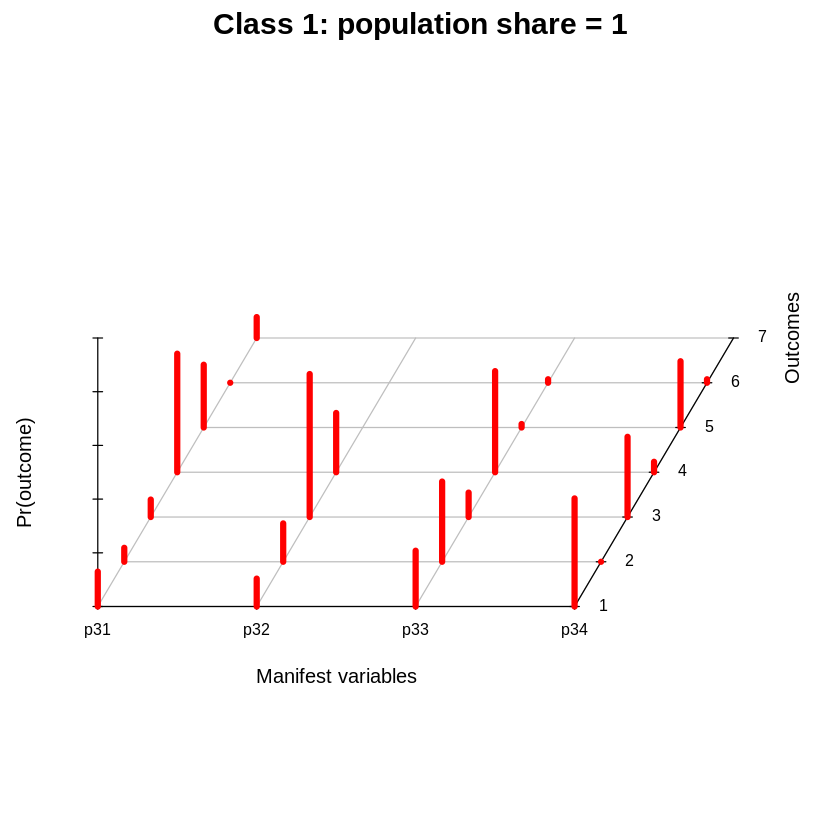

In [55]:
funcion <- poLCA(f_ciudadania, data=data_ciudadania, nclass = 1, maxiter = 1000, graphs = TRUE,
tol = 1e-10, na.rm = TRUE, probs.start = NULL, nrep = 1,
verbose = TRUE, calc.se = TRUE)

Ajuste a una clase latente
========================================================= 
Numero de datos: 101 

Numero de parametros estimados: 20

Grados de libertad: 81 

Maxima log-verosimilutd: -610.3298 Es una medida de ajuste del modelo

Coeficiente de Akaike (Mientras más pequeño el AIC es mejor modeelo comparativamente, la comparación sólo es valida entre conjuntos con las mismas variables. Pero es sensible al numero de datos)

AIC(1): 1260.66

Coeficiente BIC (Igual al anterior, es menos sensible a la cantidad de datos, pero en este caso se estanca siempre en 1, este es sensible a los grados de libertad)

BIC(1): 1312.962

G^2(1): 361.3647 (Likelihood ratio/deviance statistic) 

X^2(1): 2669.052 (Chi-square goodness of fit) 

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$p31
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5) Pr(6)  Pr(7)
class 1:  0.3771 0.0929 0.3405 0.0003 0.0000     0 0.1891
class 2:  0.0716 0.0423 0.0000 0.5455 0.2889     0 0.0517

$p32
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.3088 0.2647 0.0000 0.4265
class 2:  0.0556 0.1142 0.6579 0.1723

$p33
           Pr(1)  Pr(2)  Pr(3)  Pr(4) Pr(5)  Pr(6)
class 1:  0.3943 0.2392 0.1972 0.1012 0.000 0.0681
class 2:  0.1638 0.3127 0.0659 0.4415 0.016 0.0000

$p34
           Pr(1) Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.4393     0 0.0880 0.0000 0.4046 0.0681
class 2:  0.3939     0 0.3484 0.0481 0.2096 0.0000

Estimated class population shares 
 0.1907 0.8093 
 
Predicted class memberships (by modal posterior prob.) 
 0.1948 0.8052 
 
Fit for 2 latent classes: 
number of observations: 77 
number of estimated parameters: 39 
residual degrees of freedom: 38 
maximum log-likelihood: -393.8867 


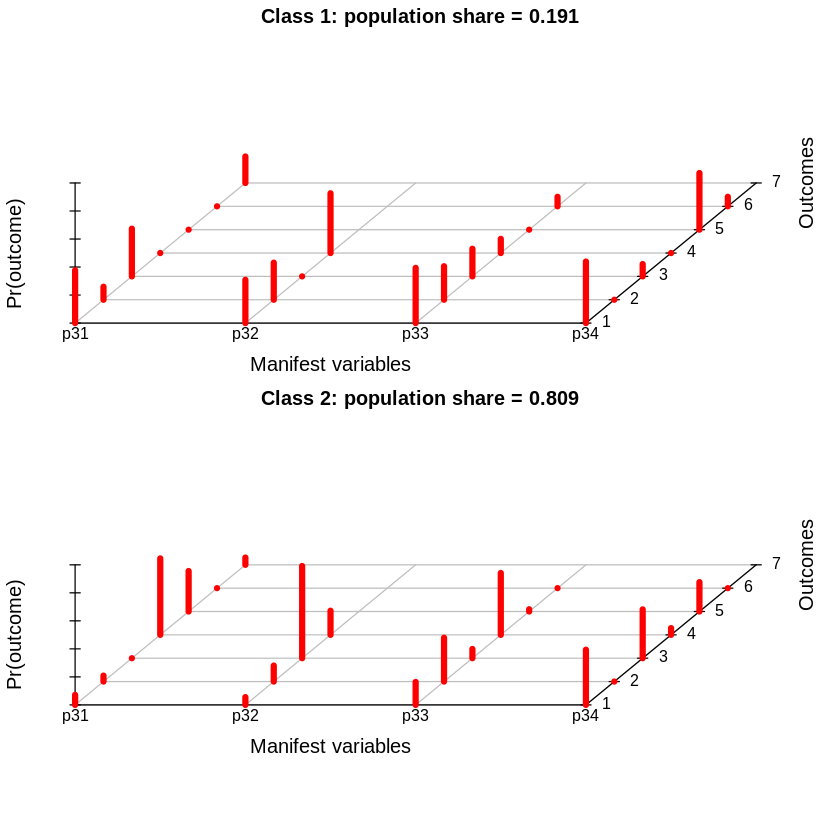

In [56]:
funcion <- poLCA(f_ciudadania, data=data_ciudadania, nclass = 2, maxiter = 1000, graphs = TRUE,
tol = 1e-10, na.rm = TRUE, probs.start = NULL, nrep = 1,
verbose = TRUE, calc.se = TRUE)

Ajuste a una clase latente
========================================================= 
Numero de datos: 101 

Numero de parametros estimados: 41

Grados de libertad: 60

Maxima log-verosimilutd: -588.4774  Es una medida de ajuste del modelo

Coeficiente de Akaike (Mientras más pequeño el AIC es mejor modeelo comparativamente, la comparación sólo es valida entre conjuntos con las mismas variables. Pero es sensible al numero de datos)

AIC(1): 1258.955

Coeficiente BIC (Igual al anterior, es menos sensible a la cantidad de datos, pero en este caso se estanca siempre en 1, este es sensible a los grados de libertad)

BIC(1): 1366.175

G^2(1): 317.66 (Likelihood ratio/deviance statistic) 

X^2(1): 1355.149 (Chi-square goodness of fit) 

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$p31
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5) Pr(6)  Pr(7)
class 1:  0.0568 0.0269 0.0000 0.5801 0.2864     0 0.0497
class 2:  0.1903 0.0984 0.2077 0.2757 0.2279     0 0.0000
class 3:  0.2418 0.0603 0.0606 0.2889 0.1091     0 0.2393

$p32
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.0000 0.0815 0.8799 0.0385
class 2:  0.3031 0.3966 0.2446 0.0556
class 3:  0.1311 0.0000 0.0000 0.8689

$p33
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.1901 0.1672 0.0732 0.5695 0.0000 0.0000
class 2:  0.2682 0.5324 0.0000 0.1475 0.0519 0.0000
class 3:  0.1814 0.3546 0.2414 0.1620 0.0000 0.0606

$p34
           Pr(1) Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.4179     0 0.4264 0.0000 0.1558 0.0000
class 2:  0.7149     0 0.1707 0.1144 0.0000 0.0000
class 3:  0.0000     0 0.1290 0.0484 0.7621 0.0606

Estimated class population shares 
 0.5356 0.2501 0.2143 
 
Predicted class membersh

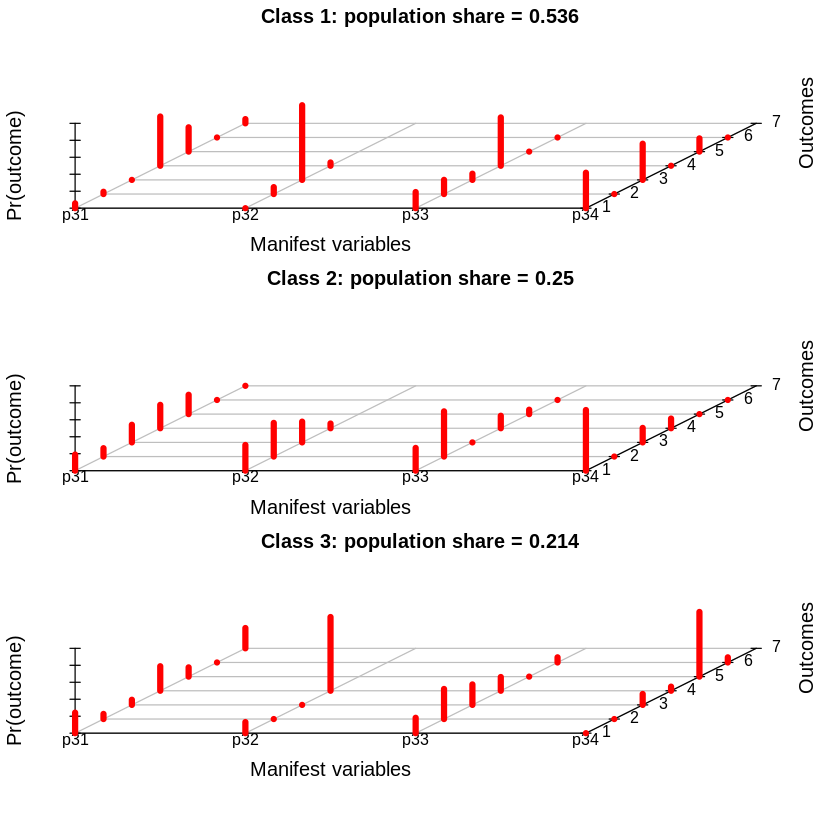

In [57]:
funcion <- poLCA(f_ciudadania, data=data_ciudadania, nclass = 3, maxiter = 1000, graphs = TRUE,
tol = 1e-10, na.rm = TRUE, probs.start = NULL, nrep = 1,
verbose = TRUE, calc.se = TRUE)

# Este es el mejor modelo según AIC

Ajuste a una clase latente
========================================================= 
Numero de datos: 101 

Numero de parametros estimados: 62

Grados de libertad: 39 

Maxima log-verosimilutd: -558.8194 Es una medida de ajuste del modelo

Coeficiente de Akaike (Mientras más pequeño el AIC es mejor modeelo comparativamente, la comparación sólo es valida entre conjuntos con las mismas variables. Pero es sensible al numero de datos)

AIC(1): 1241.639

Coeficiente BIC (Igual al anterior, es menos sensible a la cantidad de datos, pero en este caso se estanca siempre en 1, este es sensible a los grados de libertad)

BIC(1): 1403.776

G^2(1): 258.3439 (Likelihood ratio/deviance statistic) 

X^2(1): 539.1803 (Chi-square goodness of fit) 

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$p31
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5) Pr(6)  Pr(7)
class 1:  0.0595 0.0131 0.0000 0.8658 0.0000     0 0.0615
class 2:  0.2495 0.1582 0.2470 0.0000 0.3453     0 0.0000
class 3:  0.0000 0.0000 0.0000 0.0000 1.0000     0 0.0000
class 4:  0.2351 0.0592 0.0593 0.2941 0.1187     0 0.2336

$p32
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.0577 0.1509 0.7543 0.0371
class 2:  0.2450 0.3668 0.3265 0.0618
class 3:  0.0000 0.0000 1.0000 0.0000
class 4:  0.1244 0.0000 0.0000 0.8756

$p33
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.1599 0.2411 0.0000 0.5692 0.0298 0.0000
class 2:  0.2463 0.5489 0.0000 0.2048 0.0000 0.0000
class 3:  0.3539 0.0000 0.2882 0.3578 0.0000 0.0000
class 4:  0.1758 0.3574 0.2373 0.1701 0.0000 0.0593

$p34
           Pr(1) Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.4292     0 0.4448 0.0000 0.1260 0.0000
class 2:  0.8765     0 0.0000 0.1235 0.

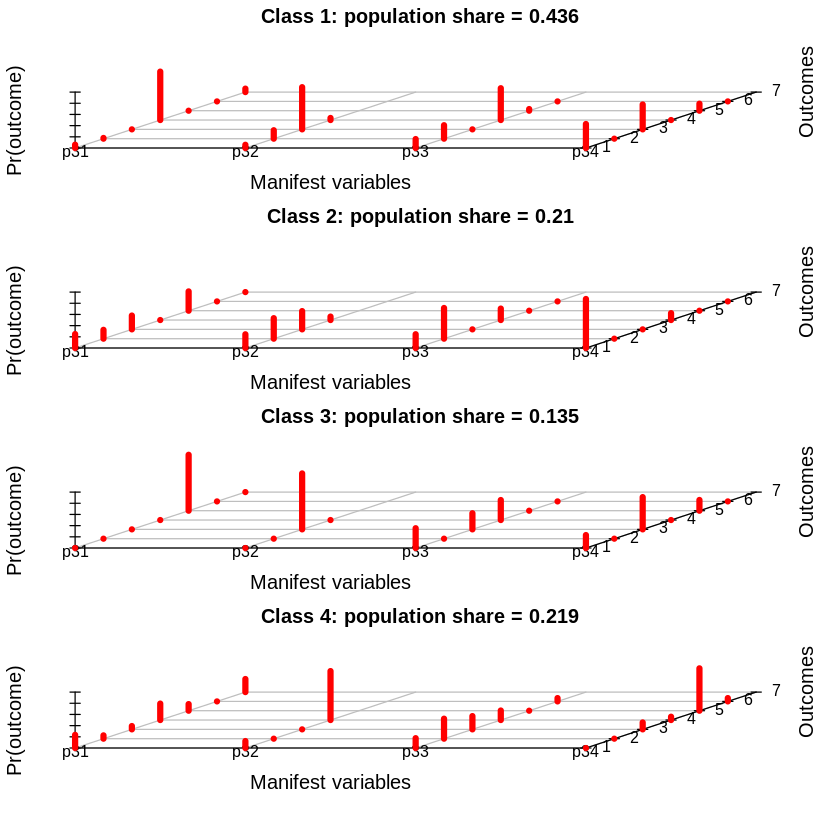

In [58]:
funcion <- poLCA(f_ciudadania, data=data_ciudadania, nclass = 4, maxiter = 1000, graphs = TRUE,
tol = 1e-10, na.rm = TRUE, probs.start = NULL, nrep = 1,
verbose = TRUE, calc.se = TRUE)

Ajuste a una clase latente
========================================================= 
Numero de datos: 101 

Numero de parametros estimados: 83

Grados de libertad: 18 

Maxima log-verosimilutd: -551.6786 Es una medida de ajuste del modelo

Coeficiente de Akaike (Mientras más pequeño el AIC es mejor modeelo comparativamente, la comparación sólo es valida entre conjuntos con las mismas variables. Pero es sensible al numero de datos)

AIC(1): 1269.357

Coeficiente BIC (Igual al anterior, es menos sensible a la cantidad de datos, pero en este caso se estanca siempre en 1, este es sensible a los grados de libertad)

BIC(1): 1486.412

G^2(1): 244.0624 (Likelihood ratio/deviance statistic) 

X^2(1): 2195.424 (Chi-square goodness of fit) 

# Transformación de datos caracteristicos

In [59]:
datos_corregidos$`p1 genero`[datos_corregidos$`p1 genero`=='mujer']<- 1
datos_corregidos$`p1 genero`[datos_corregidos$`p1 genero`=='hombre']<- 2
datos_corregidos$`p1 genero`=as.numeric(datos_corregidos$`p1 genero`)
#datos_corregidos$`p1 genero`

In [60]:
datos_corregidos$`p2 dependencia`[datos_corregidos$`p2 dependencia` == "municipal"] <- 1
datos_corregidos$`p2 dependencia`[datos_corregidos$`p2 dependencia` == "particular"] <- 2
datos_corregidos$`p2 dependencia`[datos_corregidos$`p2 dependencia` == "subvencionado"] <- 3
datos_corregidos$`p2 dependencia`=as.numeric(datos_corregidos$`p2 dependencia`)
#datos_corregidos$`p2 dependencia`

In [61]:
datos_corregidos$`p4 profesion`[datos_corregidos$`p4 profesion` == "basica"] <- 1
datos_corregidos$`p4 profesion`[datos_corregidos$`p4 profesion` == "diferencial"] <- 2
datos_corregidos$`p4 profesion`[datos_corregidos$`p4 profesion` == "media"] <- 3
datos_corregidos$`p4 profesion`[datos_corregidos$`p4 profesion` == "parvulo"] <- 4
datos_corregidos$`p4 profesion`=as.numeric(datos_corregidos$`p4 profesion`)
#datos_corregidos$`p4 profesion`

In [62]:
datos_corregidos$`p5 genero-director`[datos_corregidos$`p5 genero-director`=='mujer']<- 1
datos_corregidos$`p5 genero-director`[datos_corregidos$`p5 genero-director`=='hombre']<- 2
datos_corregidos$`p5 genero-director`=as.numeric(datos_corregidos$`p5 genero-director`)
#datos_corregidos$`p5 genero-director`

In [63]:
datos_corregidos$`p6 genero-utp`[datos_corregidos$`p6 genero-utp`=='mujer']<- 1
datos_corregidos$`p6 genero-utp`[datos_corregidos$`p6 genero-utp`=='hombre']<- 2
datos_corregidos$`p6 genero-utp`=as.numeric(datos_corregidos$`p6 genero-utp`)
#datos_corregidos$`p6 genero-utp`

In [64]:
datos_corregidos$`p7genero-inspector`[datos_corregidos$`p7genero-inspector`=='mujer']<- 1
datos_corregidos$`p7genero-inspector`[datos_corregidos$`p7genero-inspector`=='hombre']<- 2
datos_corregidos$`p7genero-inspector`=as.numeric(datos_corregidos$`p7genero-inspector`)
#datos_corregidos$`p7genero-inspector`

# Analisis Factorial para data ordinal

In [65]:
library(psych)
load("polychoric")

# Liderazgo autoritario

In [66]:
data_LA=datos_corregidos[,8:17]
names(data_LA)=c('p8','p9','p10','p11','p12','p13','p14','p15','p16','p17')
des_LA = describe(data_LA)

In [67]:
knitr::kable(des_LA[,c("min", "max", "mean", "median", "skew", "kurtosis")], main = "Data Summary")



|    | min| max|     mean| median|       skew|   kurtosis|
|:---|---:|---:|--------:|------:|----------:|----------:|
|p8  |   1|   4| 3.267327|      3| -0.5878327| -0.2258755|
|p9  |   1|   4| 3.158416|      3| -0.6810840| -0.4258163|
|p10 |   1|   4| 3.326733|      4| -0.7567251| -0.6208793|
|p11 |   1|   4| 2.762376|      3| -0.0878248| -0.8277658|
|p12 |   1|   4| 2.475248|      3| -0.0613560| -0.7120675|
|p13 |   1|   4| 2.069307|      2|  0.5060337| -0.6918753|
|p14 |   1|   4| 1.861386|      2|  0.9267139| -0.1746832|
|p15 |   1|   4| 1.910891|      2|  0.7728314| -0.1097034|
|p16 |   1|   4| 2.396040|      2|  0.1163736| -1.1821349|
|p17 |   1|   4| 1.920792|      2|  0.7391513|  0.0242437|

In [68]:
poly_cor_LA = polychoric(data_LA)
rho_LA = poly_cor_LA$rho
#save(rho_LA, file = "polychoric")
### Thresholds/Scaling results
poly_cor_LA$tau

,1,2,3
p8,-2.3300789,-1.13249653,0.23799988
p9,-1.7553005,-0.77957077,0.21254334
p10,-2.3300789,-0.92217818,-0.03723576
p11,-1.5597800,-0.26361161,0.77957077
p12,-1.0865681,-0.01240937,1.23234086
p13,-0.4765770,0.53296269,1.34626267
p14,-0.1369262,0.81365681,1.28721373
p15,-0.3415717,0.81365681,1.48097265
p16,-0.7139671,0.11191464,0.92217818
p17,-0.4216681,0.84871553,1.55977999


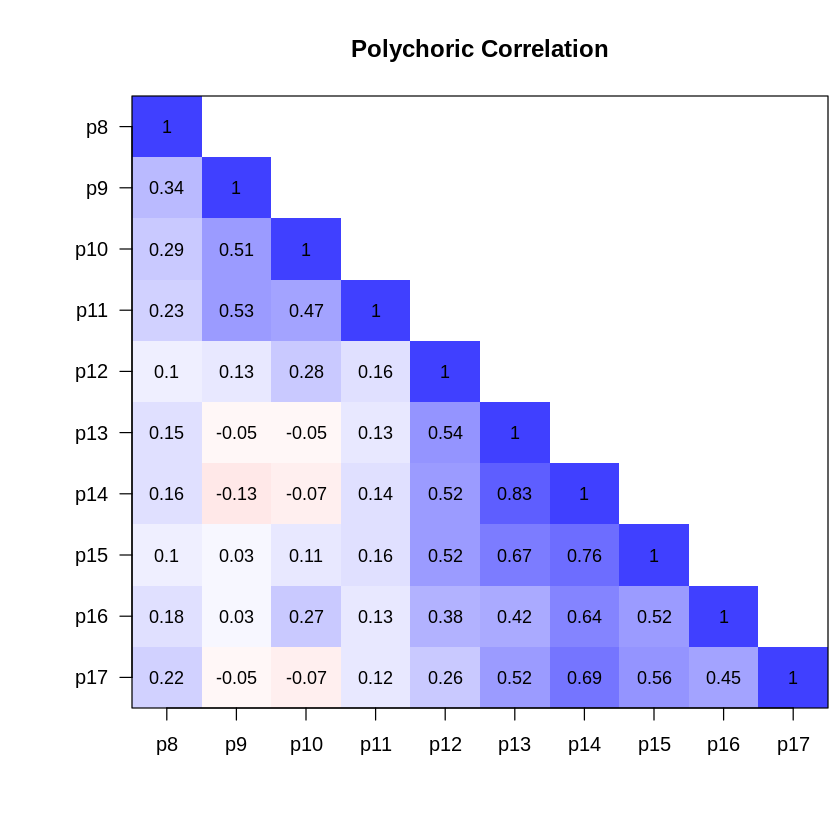

In [69]:
cor.plot(rho_LA, numbers=T, upper=FALSE, main = "Polychoric Correlation", show.legend = FALSE)

In [70]:
KMO(rho_LA)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = rho_LA)
Overall MSA =  0.73
MSA for each item = 
  p8   p9  p10  p11  p12  p13  p14  p15  p16  p17 
0.65 0.64 0.53 0.58 0.82 0.80 0.67 0.88 0.68 0.88 

Parallel analysis suggests that the number of factors =  2  and the number of components =  NA 


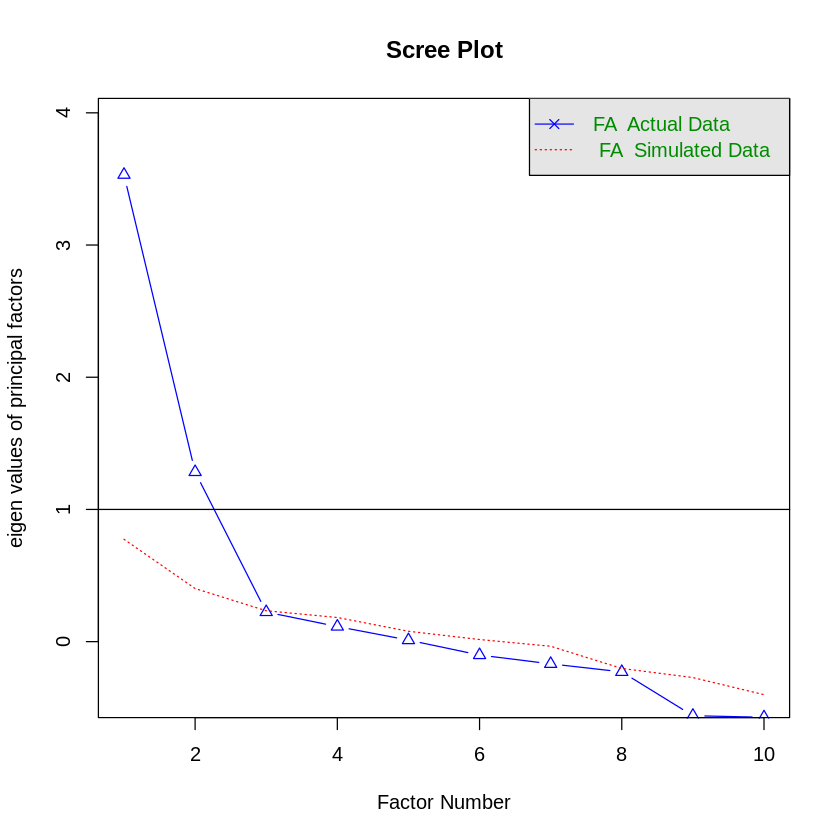

In [71]:
fa.parallel(rho_LA, fm="pa", fa="fa", main = "Scree Plot",n.iter=2,n.obs=102)

## Caso 1 cluster.

In [72]:
# Polychoric factor analysis
poly_model_LA = fa(data_LA, nfactor=1, cor="poly", fm="mle", rotate = "none")
poly_model_LA$loading


Loadings:
    ML1   
p8   0.165
p9  -0.124
p10       
p11  0.146
p12  0.529
p13  0.831
p14  0.992
p15  0.767
p16  0.644
p17  0.692

                 ML1
SS loadings    3.505
Proportion Var 0.350

## Caso 2 clusters.

In [73]:
# Polychoric factor analysis
poly_model_LA = fa(data_LA, nfactor=2, cor="poly", fm="mle", rotate = "none")
poly_model_LA$loading


Loadings:
    ML1    ML2   
p8   0.162  0.383
p9  -0.131  0.700
p10         0.802
p11  0.144  0.610
p12  0.523  0.306
p13  0.827       
p14  0.997       
p15  0.761  0.174
p16  0.643  0.252
p17  0.690       

                 ML1   ML2
SS loadings    3.492 1.841
Proportion Var 0.349 0.184
Cumulative Var 0.349 0.533

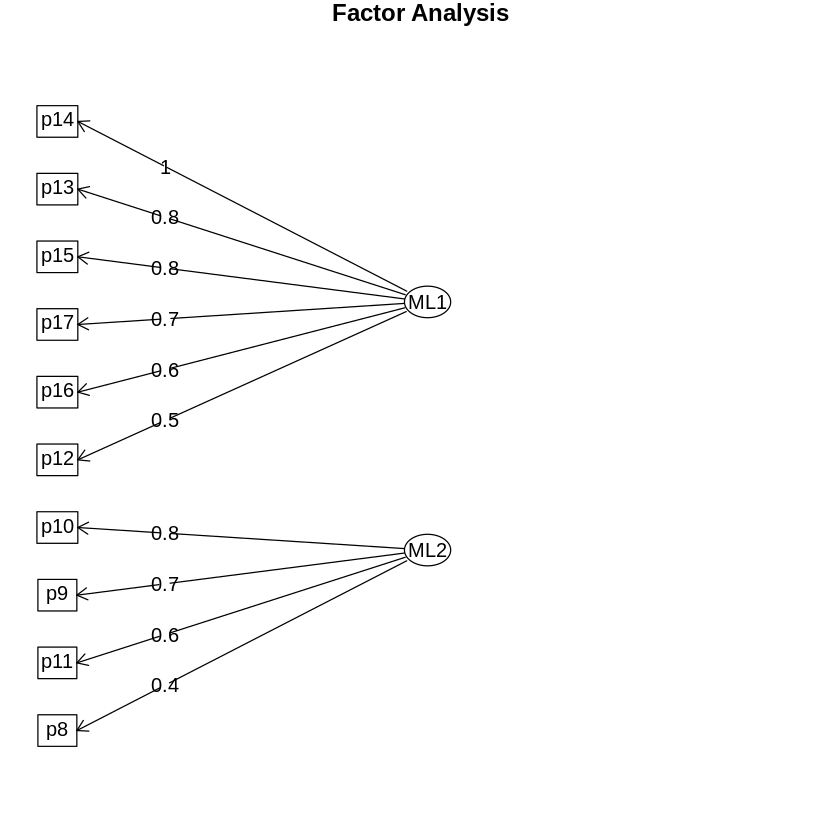

In [74]:
fa.diagram(poly_model_LA)

# Sugerido por el algoritmo

## Caso 3 clusters.

In [75]:
# Polychoric factor analysis
poly_model_LA = fa(data_LA, nfactor=3, cor="poly", fm="mle", rotate = "none")
poly_model_LA$loadings


Loadings:
    ML1    ML3    ML2   
p8   0.187  0.379       
p9          0.734 -0.203
p10  0.122  0.659 -0.414
p11  0.150  0.665       
p12  0.493  0.292  0.181
p13  0.677  0.108  0.498
p14  0.894         0.443
p15  0.698  0.170  0.305
p16  0.915        -0.396
p17  0.624         0.294

                 ML1   ML3   ML2
SS loadings    3.289 1.685 1.027
Proportion Var 0.329 0.168 0.103
Cumulative Var 0.329 0.497 0.600

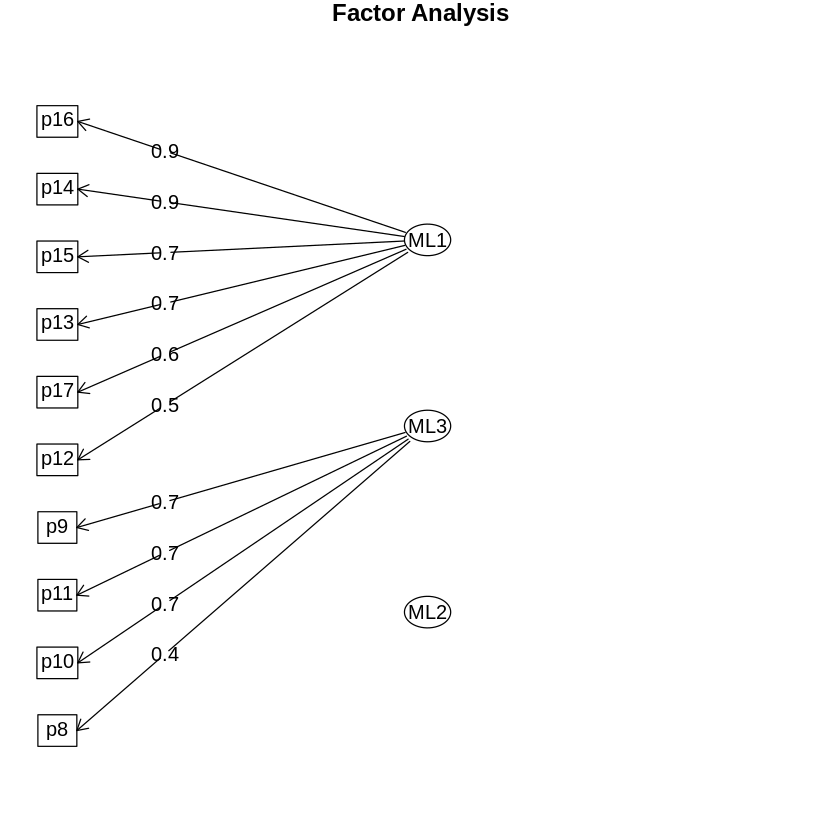

In [76]:
fa.diagram(poly_model_LA)

# Formación minimalista

In [77]:
data_FM = datos_corregidos[,18:20]
names(data_FM)=c('p18','P19','p20')
des_FM = describe(data_FM)

In [78]:
knitr::kable(des_FM[,c("min", "max", "mean", "median", "skew", "kurtosis")], main = "Data Summary")



|    | min| max|     mean| median|       skew|   kurtosis|
|:---|---:|---:|--------:|------:|----------:|----------:|
|p18 |   1|   4| 2.970297|      3| -0.6270447| -0.5561803|
|P19 |   1|   4| 2.990099|      3| -0.7426215| -0.6895873|
|p20 |   1|   4| 2.633663|      3| -0.2241618| -1.2017605|

In [79]:
poly_cor_FM = polychoric(data_FM)
rho_FM = poly_cor_FM$rho
#save(rho_LA, file = "polychoric")
### Thresholds/Scaling results
poly_cor_FM$tau

,1,2,3
p18,-1.2872137,-0.6209182,0.4216681
P19,-1.0428242,-0.6513021,0.2636116
p20,-0.8487155,-0.2125433,0.6822996


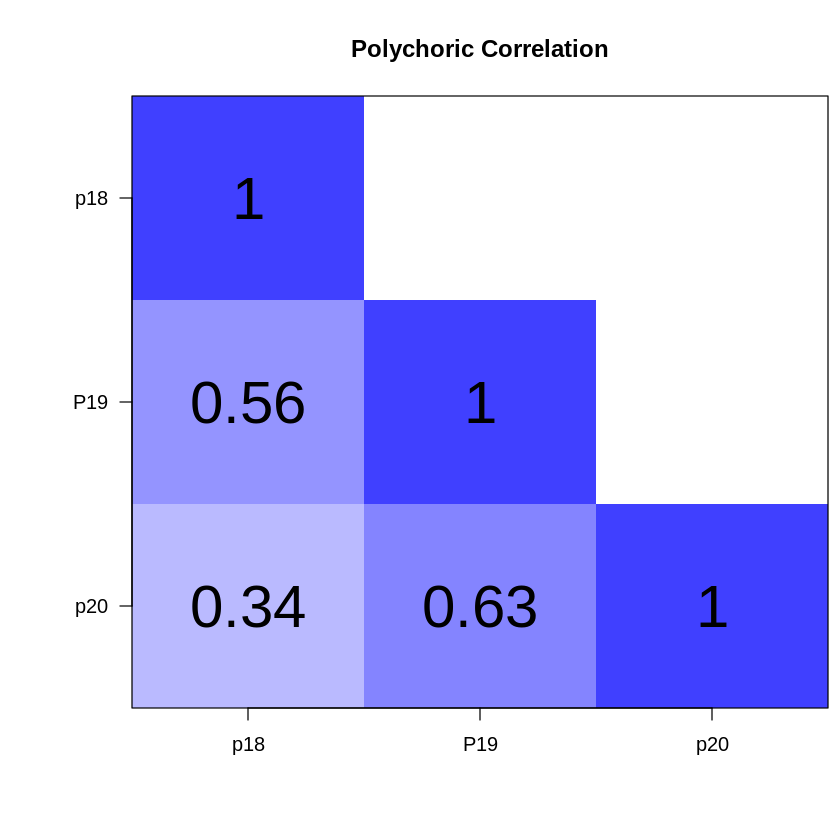

In [80]:
cor.plot(rho_FM, numbers=T, upper=FALSE, main = "Polychoric Correlation", show.legend = FALSE)

## Test KMO

In [81]:
KMO(rho_FM)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = rho_FM)
Overall MSA =  0.6
MSA for each item = 
 p18  P19  p20 
0.66 0.57 0.62 

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
“The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method.”
Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
“An ultra-Heywood case was detected.  Examine the results carefully”


Parallel analysis suggests that the number of factors =  1  and the number of components =  NA 


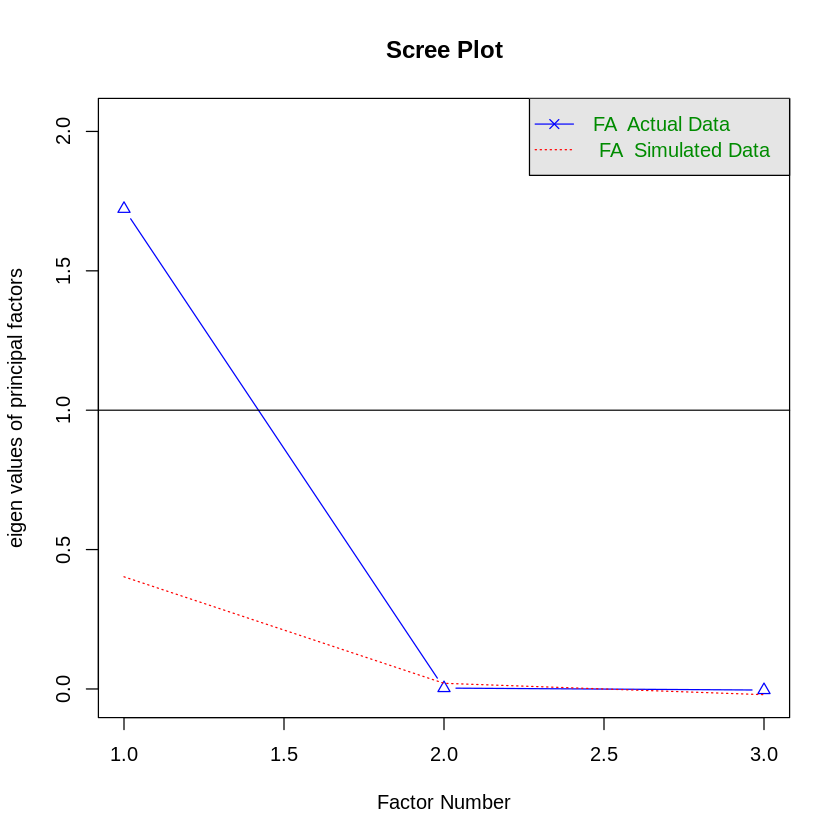

In [82]:
fa.parallel(rho_FM, fm="pa", fa="fa", main = "Scree Plot",n.iter=2,n.obs=102)

# Caso sugerido por el algoritmo

## Caso 1 cluster.

In [83]:
# Polychoric factor analysis
poly_model_FM = fa(data_FM, nfactor=1, cor="poly", fm="mle", rotate = "none")
poly_model_FM$loading


Loadings:
    ML1  
p18 0.564
P19 0.997
p20 0.635

                 ML1
SS loadings    1.717
Proportion Var 0.572

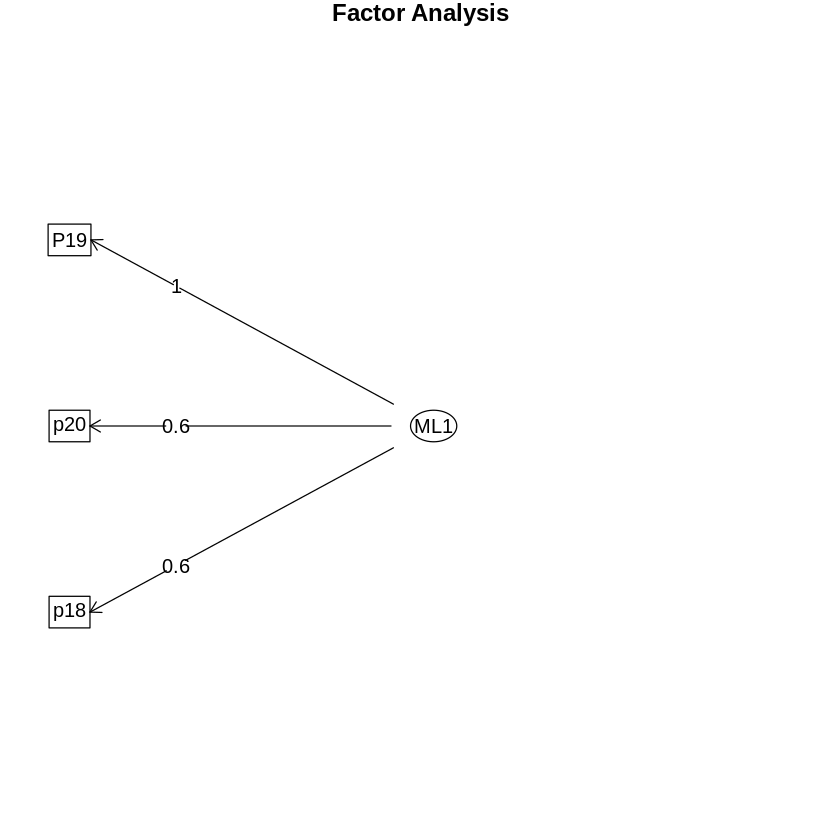

In [84]:
fa.diagram(poly_model_FM)

## Caso 2 clusters.

In [85]:
# Polychoric factor analysis
poly_model_FM = fa(data_FM, nfactor=2, cor="poly", fm="mle", rotate = "none")
poly_model_FM$loading


Loadings:
    ML1    ML2   
p18  0.653  0.422
P19  0.858       
p20  0.741 -0.331

                 ML1   ML2
SS loadings    1.712 0.288
Proportion Var 0.571 0.096
Cumulative Var 0.571 0.667

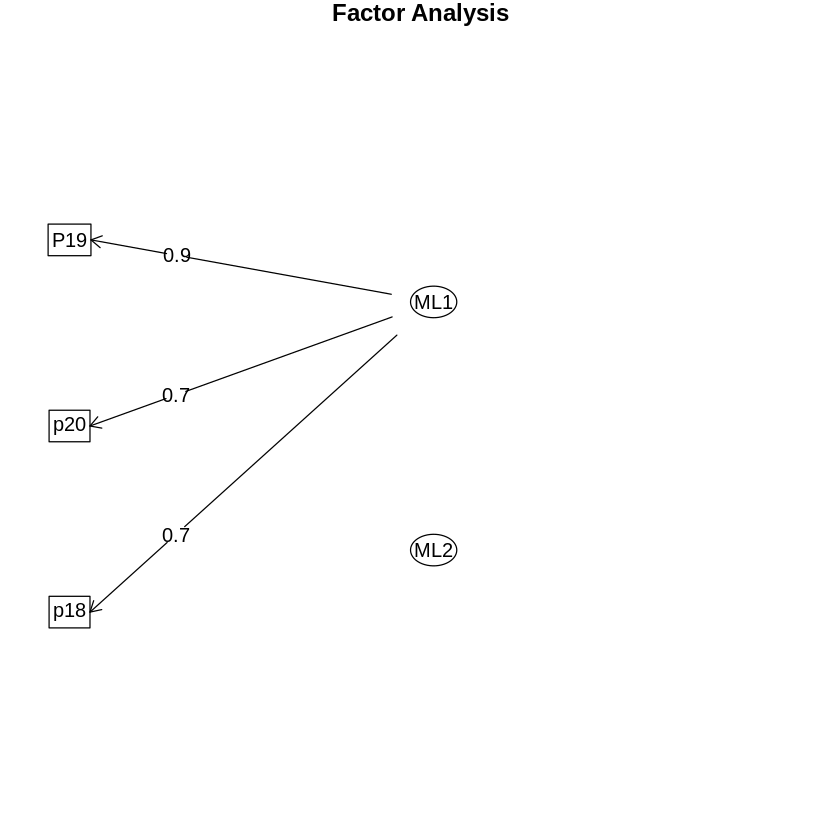

In [86]:
fa.diagram(poly_model_FM)

## Caso 3 clusters.

In [87]:
# Polychoric factor analysis
poly_model_FM = fa(data_FM, nfactor=3, cor="poly", fm="mle", rotate = "none")
poly_model_FM$loading


Loadings:
    ML1    ML2    ML3   
p18  0.609              
P19  0.797              
p20  0.687              

                 ML1   ML2   ML3
SS loadings    1.478 0.013 0.000
Proportion Var 0.493 0.004 0.000
Cumulative Var 0.493 0.497 0.497

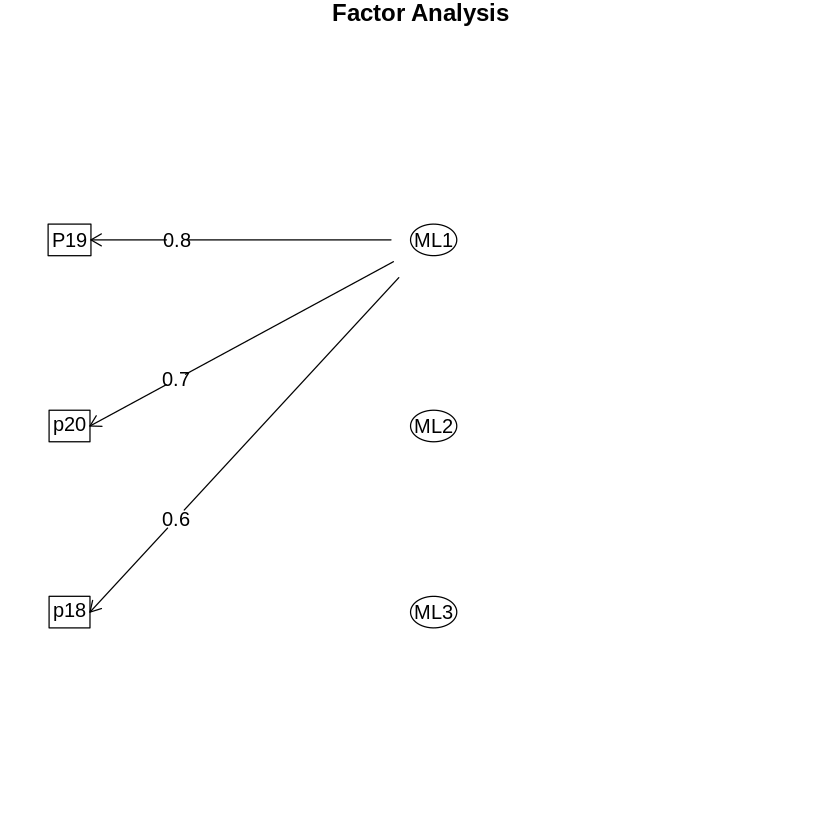

In [88]:
fa.diagram(poly_model_FM)

# Liderazgo Democratico

In [89]:
names(data_LD)=c('p25','P26','p37','p38','p39','p40','p41','p42')
des_LD = describe(data_LD)

In [90]:
knitr::kable(des_LD[,c("min", "max", "mean", "median", "skew", "kurtosis")], main = "Data Summary")



|    | min| max|     mean| median|       skew|   kurtosis|
|:---|---:|---:|--------:|------:|----------:|----------:|
|p25 |   1|   4| 2.891089|      3| -0.6016303| -0.2064549|
|P26 |   1|   4| 3.544554|      4| -1.7465161|  2.2876762|
|p37 |   1|   4| 3.475248|      4| -1.2865060|  1.6673820|
|p38 |   1|   4| 3.297030|      3| -0.9259637|  0.2213116|
|p39 |   1|   4| 3.485149|      4| -1.1636441|  0.4968490|
|p40 |   1|   4| 3.386139|      3| -0.8277772|  0.2775274|
|p41 |   1|   4| 3.217822|      3| -0.6504721| -0.1485157|
|p42 |   1|   4| 3.346535|      4| -1.0856894|  0.1450966|

In [91]:
poly_cor_LD = polychoric(data_LD)
rho_LD = poly_cor_LD$rho
#save(rho_LA, file = "polychoric")
### Thresholds/Scaling results
poly_cor_LD$tau

,1,2,3
p25,-1.346263,-0.6513021,0.71396710
P26,-1.755301,-1.2323409,-0.50456929
p37,-2.057856,-1.4809727,-0.16202378
p38,-1.885177,-1.0428242,0.06208512
p39,-2.330079,-1.2323409,-0.26361161
p40,-2.330079,-1.3462627,0.03723576
p41,-2.057856,-1.0009899,0.26361161
p42,-1.755301,-0.9221782,-0.16202378


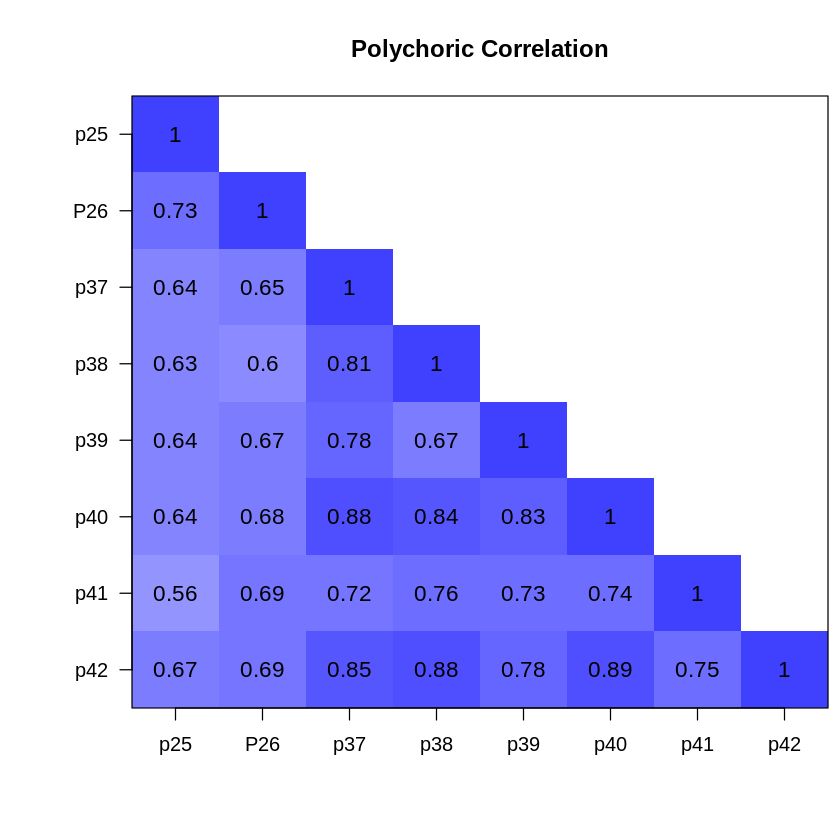

In [92]:
cor.plot(rho_LD, numbers=T, upper=FALSE, main = "Polychoric Correlation", show.legend = FALSE)

## Test KMO

In [93]:
KMO(rho_LD)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = rho_LD)
Overall MSA =  0.89
MSA for each item = 
 p25  P26  p37  p38  p39  p40  p41  p42 
0.87 0.87 0.95 0.85 0.88 0.89 0.88 0.93 

Parallel analysis suggests that the number of factors =  1  and the number of components =  NA 


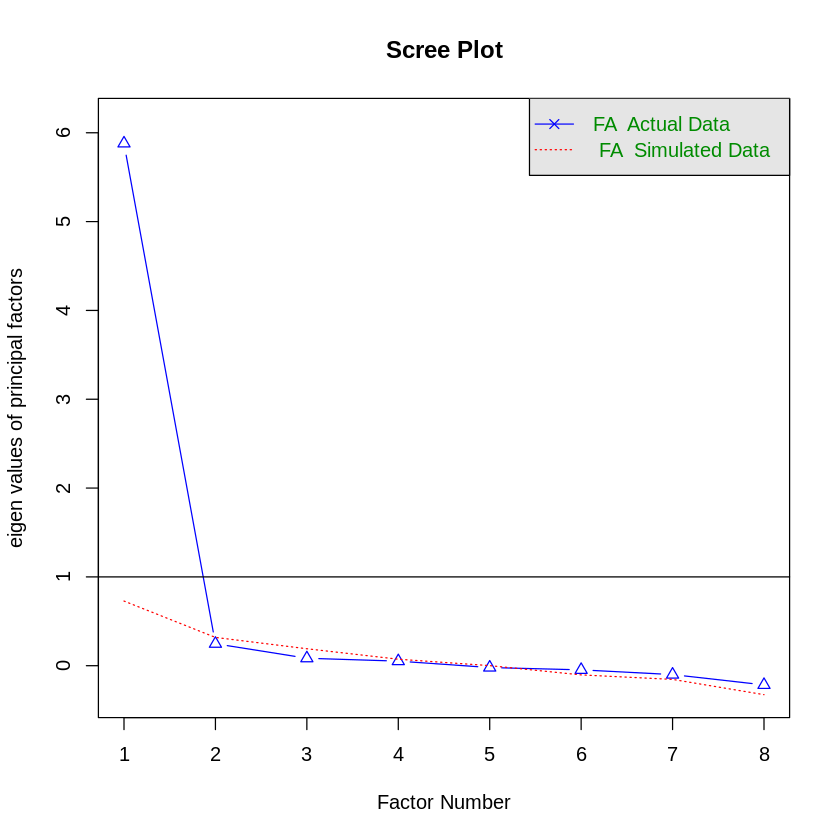

In [94]:
fa.parallel(rho_LD, fm="pa", fa="fa", main = "Scree Plot",n.iter=1,n.obs=102)

# Sugerido por el test
## Caso 1 cluster.

In [95]:
# Polychoric factor analysis
poly_model_LD = fa(data_FM, nfactor=1, cor="poly", fm="mle", rotate = "none")
poly_model_LD$loading


Loadings:
    ML1  
p18 0.564
P19 0.997
p20 0.635

                 ML1
SS loadings    1.717
Proportion Var 0.572

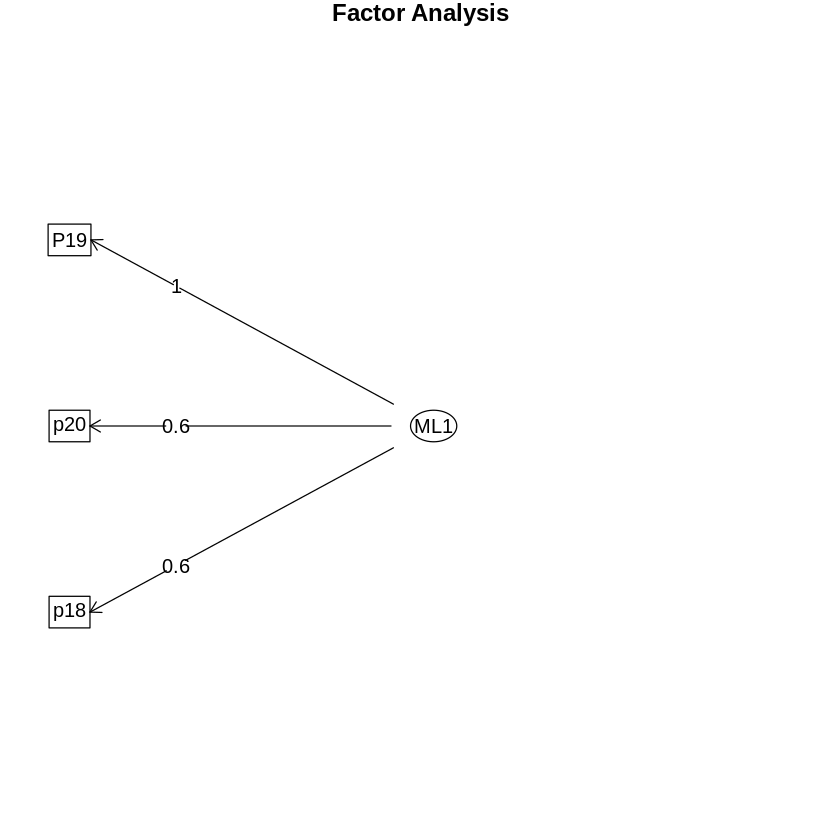

In [96]:
fa.diagram(poly_model_LD)

## Caso 2 clusters.

In [97]:
# Polychoric factor analysis
poly_model_LD = fa(data_FM, nfactor=2, cor="poly", fm="mle", rotate = "none")
poly_model_LD$loading


Loadings:
    ML1    ML2   
p18  0.653  0.422
P19  0.858       
p20  0.741 -0.331

                 ML1   ML2
SS loadings    1.712 0.288
Proportion Var 0.571 0.096
Cumulative Var 0.571 0.667

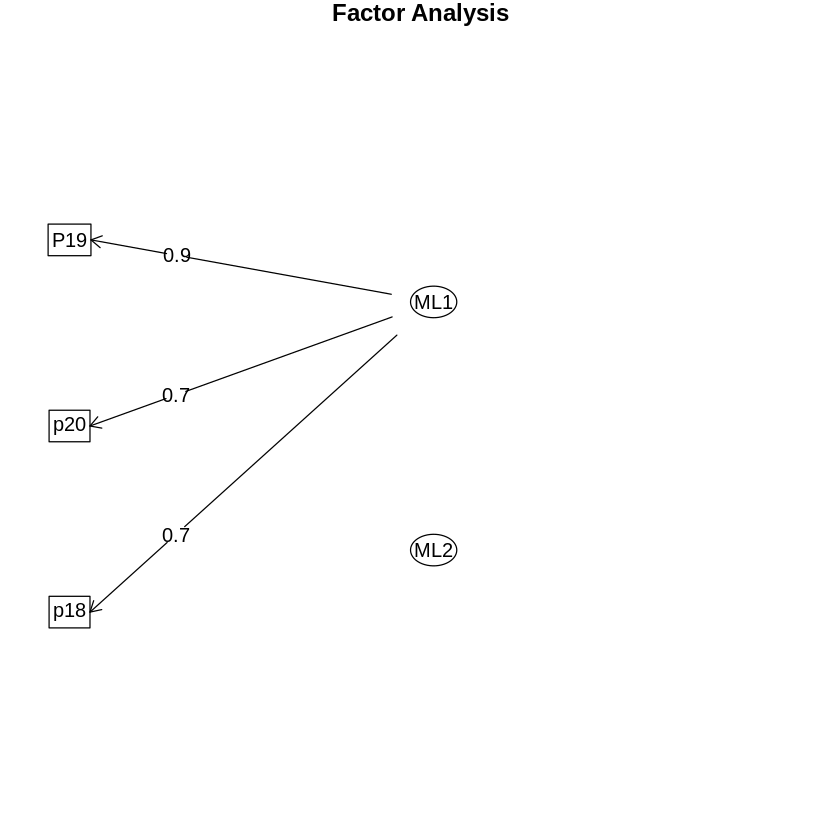

In [98]:
fa.diagram(poly_model_LD)

## Caso 3 clusters.

In [99]:
# Polychoric factor analysis
poly_model_LD = fa(data_LD, nfactor=3, cor="poly", fm="mle", rotate = "none")
poly_model_LD$loading


Loadings:
    ML1    ML3    ML2   
p25  0.759        -0.127
P26  0.886        -0.459
p37  0.832  0.336  0.183
p38  0.901         0.426
p39  0.762  0.462       
p40  0.870  0.366  0.174
p41  0.817  0.105       
p42  0.890  0.224  0.212

                 ML1   ML3   ML2
SS loadings    5.661 0.527 0.521
Proportion Var 0.708 0.066 0.065
Cumulative Var 0.708 0.773 0.839

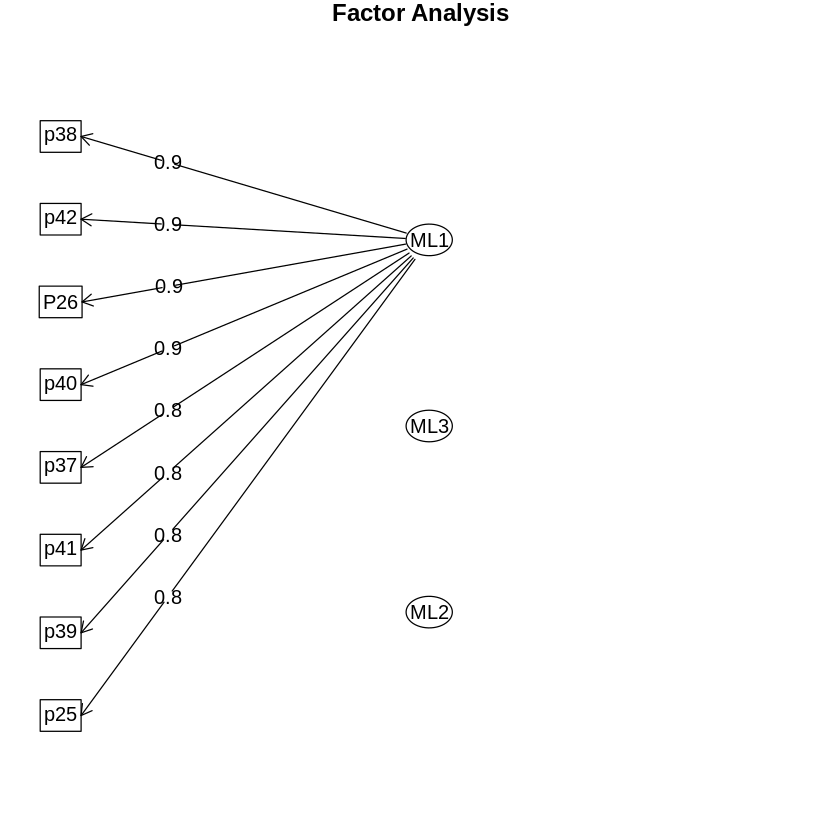

In [100]:
fa.diagram(poly_model_LD)

# Caso raro que no recomiendo considerar

## Caso 4 clusters.

In [101]:
# Polychoric factor analysis
poly_model_LD = fa(data_LD, nfactor=4, cor="poly", fm="mle", rotate = "none")
poly_model_LD$loading


Loadings:
    ML1    ML4    ML2    ML3   
p25  0.818        -0.566       
P26  0.770  0.147 -0.153 -0.204
p37  0.843  0.319         0.121
p38  0.918         0.171  0.350
p39  0.788  0.407        -0.119
p40  0.862  0.412         0.151
p41  0.886         0.335 -0.312
p42  0.891  0.232         0.180

                 ML1   ML4   ML2   ML3
SS loadings    5.756 0.514 0.503 0.351
Proportion Var 0.720 0.064 0.063 0.044
Cumulative Var 0.720 0.784 0.847 0.891

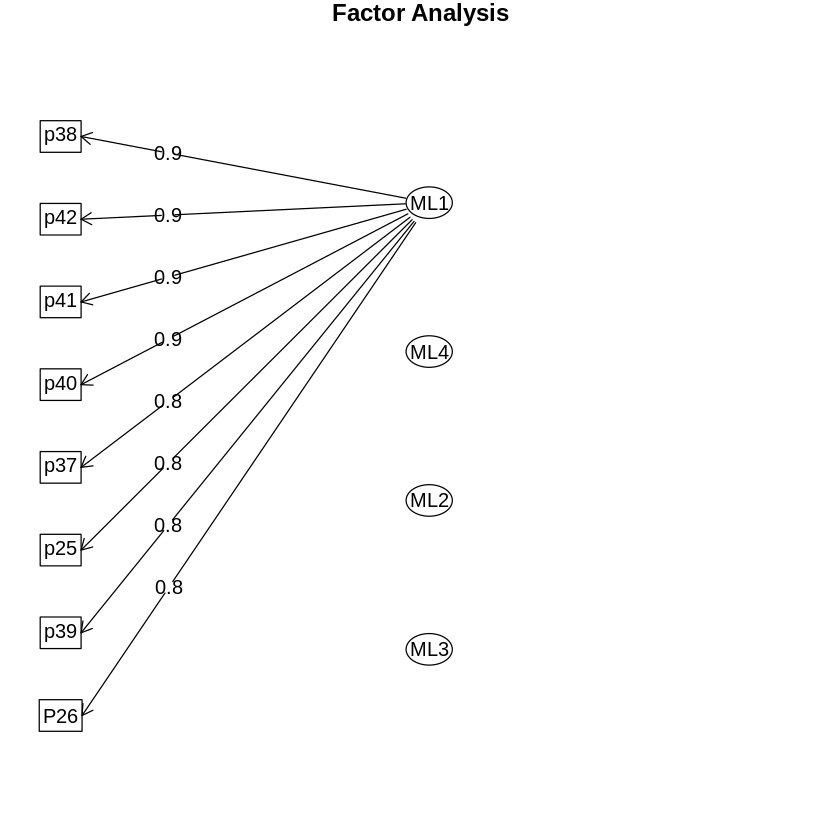

In [102]:
fa.diagram(poly_model_LD)